<hr>

**<h1><b> CS437/CS5317/EE414/EE513 Deep Learning | <span style="color: #9370DB;"> PA2</span></b></h1>**

<hr>

## <span style="color: #9370DB;">**Submission Guidelines**</span>

- <span style="color: #9370DB;">Please rename the file to `<RollNumber>_PA2_2`.</span>
- <span style="color: #9370DB;">Please also submit a **.py** file of every Notebook. You can do this by exporting your **ipynb** to a Python script.</span>
- <span style="color: #9370DB;">Please submit a zipped folder of both your Jupyter Notebooks and Python script files.</span>

In [1]:
# ============ Import Libraries =============
import warnings
warnings.filterwarnings('ignore')
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from torchsummary import summary
import random
import matplotlib.pyplot as plt
import torchvision.utils as vutils
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, adjusted_rand_score, normalized_mutual_info_score
from torchvision.utils import make_grid 

# =========== Student Information ===========
Name = "Muhammad Abubakar Mughal" 
Roll_Number = 26100228

# =========== Device Configuration ==========
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') # GPU is available or not
# device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu') # MPS is available or not - Only for Macbook M1 and above
print(f"Device: {device}")

# =========== Visualization Function ==========
def imshow(img, dataset_name):
    img = img
    npimg = img.numpy()
    plt.figure(figsize=(10, 10))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.title(f"Random Batch of Images from the {dataset_name} Dataset")
    plt.show()
    

Device: cuda


<hr>

## <h1><b> Part 2: Linear Autoencoders and Autoencoders Using CNN in PyTorch <span style="color: #9370DB;"> (75 Points Total)</span></b></h1>  

<hr>

### <h2><b> Introduction </b></h2>  
<p>Autoencoders are a type of <b>unsupervised neural network</b> designed to learn efficient data representations. They consist of two main components:</p>  
<ul>  
    <li><b>Encoder:</b> Compresses the input into a lower-dimensional latent space.</li>  
    <li><b>Decoder:</b> Reconstructs the original input from the encoded representation.</li>  
</ul>  

<p>This structure makes autoencoders useful for various tasks, including:</p>  
<ul>  
    <li>Dimensionality reduction</li>
    <li>Noise removal (denoising autoencoders)</li>  
    <li>Anomaly detection</li>  
    <li>Feature extraction for downstream tasks</li>  
</ul>

<hr>  

<h2><b> Linear and Convolutional Autoencoders </b></h2>  
<p>In this task, we explore two types of autoencoders:</p>  

<ul>
    <li><b>Linear Autoencoder:</b> Uses fully connected layers and learns a compressed representation of the input in a linear fashion, often simpler and less computationally intensive than convolutional variants.</li>
    <li><b>Convolutional Autoencoder (CAE):</b> Replaces fully connected layers with <b>convolutional layers</b>, making it more effective for image processing. CAEs leverage spatial hierarchies in images, capturing key features while preserving important structures.</li>    
</ul>

<hr>  

<h2><b> CIFAR-10 and MNIST Datasets </b></h2>  
<p>The <b>CIFAR-10 dataset</b> is a commonly used benchmark dataset for deep learning research. It consists of <b>60,000 color images</b> (32x32 pixels), divided into <b>10 classes</b> representing different objects:</p>  

<table border="1" cellpadding="10" cellspacing="0" style="border-collapse: collapse; text-align: center;">  
    <tr style="background-color:rgb(60, 60, 60);">  
        <th><b>Class</b></th>  
        <th>Airplane</th>  
        <th>Automobile</th>  
        <th>Bird</th>  
        <th>Cat</th>  
        <th>Deer</th>  
        <th>Dog</th>  
        <th>Frog</th>  
        <th>Horse</th>  
        <th>Ship</th>  
        <th>Truck</th>  
    </tr>  
    <tr>  
        <th style="background-color:rgb(60, 60, 60);"><b>Label</b></th>  
        <td>0</td>  
        <td>1</td>  
        <td>2</td>  
        <td>3</td>  
        <td>4</td>  
        <td>5</td>  
        <td>6</td>  
        <td>7</td>  
        <td>8</td>  
        <td>9</td>  
    </tr>  
</table>  

<p>The <b>MNIST dataset</b> contains <b>60,000 grayscale images</b> (28x28 pixels) of handwritten digits, divided into <b>10 classes</b> (digits 0-9), used primarily for digit classification and image reconstruction tasks.</p>  

<hr>

<h2><b> Objectives </b></h2>  

<ul>  
    <li>Implement an <b>Autoencoder</b> using two architectures: <b>Linear Autoencoder</b> and <b>Convolutional Autoencoder (CNN)</b>.</li>  
    <li>Design and implement <b>Encoder</b> and <b>Decoder</b> modules in PyTorch.</li>  
    <li>Train the models on <b>CIFAR-10</b> and <b>MNIST</b> datasets, evaluating their reconstruction quality.</li>  
    <li>Test the Autoencoders in <b>six scenarios</b>, each demonstrating a key application:</li>  
    <ul>
        <li>Linear Autoencoder - Reconstruction (CIFAR-10)</li>
        <li>Convolutional Autoencoder - Reconstruction (CIFAR-10)</li>
        <li>Linear Autoencoder - Denoising (MNIST)</li>
        <li>Convolutional Autoencoder - Denoising (MNIST)</li>
        <li>CNN Image Classification Analysis - CIFAR-10 Reconstruction</li>
        <li>CNN Image Classification Analysis - MNIST Denoising</li>
    </ul>
    <li>Extend the applications by implementing <b>Task 7: Generating Images using Latent Space</b> for advanced understanding and performance evaluation.</li>
</ul>  

<br>

<table border="1" cellpadding="10" cellspacing="0" width="100%">  
    <tr>  
        <th><b>Scenario</b></th>  
        <th><b>Description</b></th>  
        <th><b>Purpose</b></th>  
    </tr>  
    <tr>  
        <td><b>1. Linear Autoencoder - Reconstruction (CIFAR-10)</b></td>  
        <td>Train and test a linear autoencoder on the CIFAR-10 dataset for image reconstruction.</td>  
        <td>Demonstrates the ability of a linear autoencoder to learn compressed representations and reconstruct images from CIFAR-10.</td>  
    </tr>  
    <tr>  
        <td><b>2. Convolutional Autoencoder - Reconstruction (CIFAR-10)</b></td>  
        <td>Train and test a convolutional autoencoder on CIFAR-10 images for image reconstruction.</td>  
        <td>Shows how convolutional layers can capture spatial features and improve reconstruction performance on CIFAR-10.</td>  
    </tr>  
    <tr>  
        <td><b>3. Linear Autoencoder - Denoising (MNIST)</b></td>  
        <td>Train the model on noisy MNIST images and test its ability to reconstruct clean images.</td>  
        <td>Demonstrates how a linear autoencoder can filter noise and recover the original images from noisy inputs.</td>  
    </tr>  
    <tr>  
        <td><b>4. Convolutional Autoencoder - Denoising (MNIST)</b></td>  
        <td>Train the convolutional autoencoder on noisy MNIST digits and test its denoising capabilities.</td>  
        <td>Shows how convolutional autoencoders can better denoise images by leveraging spatial hierarchies in image data.</td>  
    </tr>
    <tr>  
        <td><b>5. CNN Image Classification Analysis - CIFAR-10 Reconstruction</b></td>  
        <td>Train a CNN on clean CIFAR-10 images and evaluate its performance on the original test data, LAERecon reconstructed test data, and CAERecon reconstructed test data.</td>  
        <td>Assesses how well the reconstructions preserve essential features for classification.</td>  
    </tr>  
    <tr>  
        <td><b>6. CNN Image Classification Analysis - MNIST Denoising</b></td>  
        <td>Train a CNN on clean MNIST images and evaluate its performance on the original test data, LAEDenoise reconstructed test data, and CAEDenoise reconstructed test data.</td>  
        <td>Assesses how well the denoising reconstructions preserve essential features for classification.</td>  
    </tr>  
    <tr>  
        <td><b>7. Generating Images using Latent Space</b></td>  
        <td>Sample random vectors from the latent space and pass them through the decoder to generate new images.</td>  
        <td>Evaluate the potential of autoencoders for generating realistic images from latent space representations.</td>  
    </tr>  
</table>  

<br>  

<p>This task will test the ability to build and apply Autoencoders in PyTorch, explore feature learning, and analyze their performance across different real-world applications.</p>

<hr>

<hr>

## <h1><b> Hyper<span style="color: #9370DB;">parameters</span></b></h1>  

<hr>

In [2]:
BATCH_SIZE = 128
EPOCHS = 10
LEARNING_RATE = 0.001

# =========== Results Dictionary (To be updated and printed at the end) ==========

Overall_Results = {
    "Task 1" : None,
    "Task 2" : None,
    "Task 3" : None,
    "Task 4" : None,
    "Task 5" : None,
    "Task 6" : None,
}

<hr>

## <h1><b> Dataset Loading |<span style="color: #9370DB;"> CIFAR-10</span></b></h1>  

<hr>

In [3]:
# ============== Data Preprocessing ==================
transform = transforms.Compose([
    transforms.ToTensor(),
])

# ================ Data Loading ======================
CIFAR_10_trainset = torchvision.datasets.CIFAR10(root='./data', train = True, download = True, transform = transform)
CIFAR_10_trainloader = torch.utils.data.DataLoader(CIFAR_10_trainset, batch_size = 128, shuffle = True)

CIFAR_10_testset = torchvision.datasets.CIFAR10(root='./data', train = False, download = True, transform = transform)
CIFAR_10_testloader = torch.utils.data.DataLoader(CIFAR_10_testset, batch_size = 128, shuffle = False)

100%|██████████| 170M/170M [00:12<00:00, 14.0MB/s] 


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


<hr>

## <h1><b> Dataset Loading |<span style="color: #9370DB;"> MINST</span></b></h1>  

<hr>

In [4]:
# ============== Data Preprocessing ==================
transform = transforms.Compose([
    transforms.ToTensor()
])

transform_noisy = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x + 0.5 * torch.randn_like(x))
])

# ================ Data Loading ======================
MNIST_trainset = torchvision.datasets.MNIST(root='./data', train = True, download = True, transform = transform)
MNIST_trainloader = torch.utils.data.DataLoader(MNIST_trainset, batch_size = 64, shuffle = True)

MNIST_testset = torchvision.datasets.MNIST(root='./data', train = False, download = True, transform = transform)
MNIST_testloader = torch.utils.data.DataLoader(MNIST_testset, batch_size = 64, shuffle = False)

MNIST_trainset_noisy = torchvision.datasets.MNIST(root='./data', train = True, download = True, transform = transform_noisy)
MNIST_trainloader_noisy = torch.utils.data.DataLoader(MNIST_trainset_noisy, batch_size = 64, shuffle = True)

MNIST_testset_noisy = torchvision.datasets.MNIST(root='./data', train = False, download = True, transform = transform_noisy)
MNIST_testloader_noisy = torch.utils.data.DataLoader(MNIST_testset_noisy, batch_size = 64, shuffle = False)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:01<00:00, 5.80MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 153kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.45MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 6.31MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



<hr>

## <h1><b> Data Visualisation |<span style="color: #9370DB;"> CIFAR-10</span></b></h1>  

<hr>

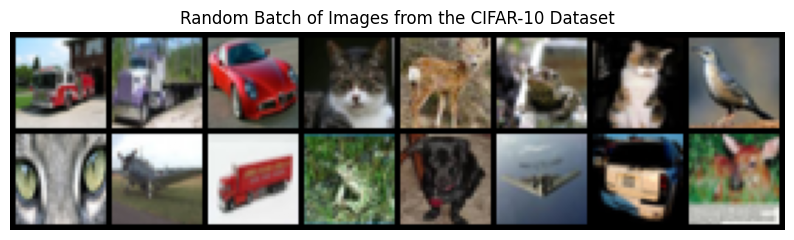

In [5]:
dataiter = iter(CIFAR_10_trainloader)
images, _ = next(dataiter)
imshow(torchvision.utils.make_grid(images[0:16]), "CIFAR-10")

<hr>

## <h1><b> Data Visualisation |<span style="color: #9370DB;"> MINST</span></b></h1>  

<hr>

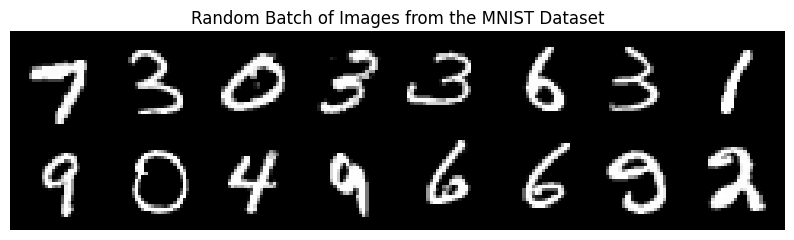

In [6]:
dataiter = iter(MNIST_trainloader)
images, _ = next(dataiter)
imshow(torchvision.utils.make_grid(images[0:16]), "MNIST")

<hr>

## <h1><b> Data Visualisation |<span style="color: #9370DB;"> MINST - Noisy</span></b></h1>  

<hr>

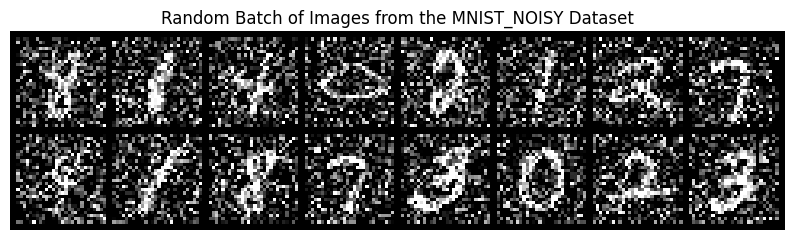

In [7]:
dataiter = iter(MNIST_trainloader_noisy)
images, _ = next(dataiter)
imshow(torchvision.utils.make_grid(images[0:16]), "MNIST_NOISY")

<hr>

## <h1 style="text-align: left;"><b>Task 1: Linear Autoencoder Reconstruction | <span style="color: #9370DB;">CIFAR-10</span></b></h1>

<hr>

### <h2>1. In a Linear Autoencoder (LAE):</h2>

<ul>
    <li>The <b>encoder</b> primarily uses <code>Linear</code> layers to compress the input into a lower-dimensional latent space.</li>
    <li>The <b>decoder</b> utilizes <code>Linear</code> layers to reconstruct the original input from the latent space.</li>
</ul>

<hr>

<h2>2. Fully Connected Layers in a Linear Autoencoder</h2>

<table border="1" cellpadding="10" cellspacing="0" width="100%">
    <tr style="background-color:rgb(60, 60, 60);">
        <th style="text-align: left;">Layer</th>
        <th style="text-align: left;">Function</th>
    </tr>
    <tr>
        <td><b>Linear</b></td>
        <td>Applies a fully connected transformation to project the input into a lower-dimensional space (encoding) or reconstruct it back (decoding).</td>
    </tr>
</table>

<p>You can read the PyTorch documentation as well for more information!</p>

<hr>

<h2>3. Understanding Linear Layers</h2>

<h3>Linear Layer</h3>
<p>A <b>Linear Layer</b> applies a fully connected transformation, mapping an input vector to an output vector using weights and biases.</p>
<p><b>Syntax:</b></p>
<pre style="background-color:rgb(60, 60, 60); padding: 10px; border-radius: 5px;">
nn.Linear(in_features, out_features)
</pre>

<ul>
    <li><b>in_features:</b> Number of input features (e.g., flattened image pixels).</li>
    <li><b>out_features:</b> Number of output features (e.g., latent space dimension).</li>
</ul>

<hr>

<hr>

### <h1 style="text-align: left;">Class | <span style="color: #9370DB;">Linear Autoencoder</span></h1>

<hr>

In [8]:
class LinearAutoencoderRecon(nn.Module):
    def __init__(self):
        super(LinearAutoencoderRecon, self).__init__()
        # ===================== YOUR CODE HERE ======================
        self.encoder = nn.Sequential(
            
            nn.Linear(3 * 32 * 32, 512),
            nn.ReLU(),
                        
            nn.Linear(512, 256),
            nn.ReLU(),
            
            nn.Linear(256, 128),
            nn.ReLU(),
        )

        self.decoder = nn.Sequential(            
            nn.Linear(128, 256),
            nn.ReLU(),
            
            nn.Linear(256, 512),
            nn.ReLU(),
            
            nn.Linear(512, 3 * 32 * 32),
            nn.Sigmoid()
        )
        # =========================================================== 
        
    def forward(self, x):
        # ===================== YOUR CODE HERE ======================
        x = x.view(x.size(0), -1)
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        decoded = decoded.view(x.size(0), 3, 32, 32)
        return decoded, encoded
        # =========================================================== 

<hr>

### <h1 style="text-align: left;">Class | <span style="color: #9370DB;">LAERecon</span></h1>

<hr>

### <p><strong>Overview:</strong><br>
The <code>LAERecon</code> is a class designed to facilitate the training, evaluation, and visualization of a <strong>Linear Autoencoder (LAE)</strong> model. It manages the training loop, computes losses, performs evaluations, and visualizes reconstructions to monitor model performance. The class also includes methods for saving and loading the model.</p>

---

<h3>Constructor (<code>__init__</code>):</h3>
<p>The constructor initializes key components:</p>
<ul>
  <li><code>model (nn.Module)</code>: The Linear Autoencoder model.</li>
  <li><code>train_loader (DataLoader)</code>: The training dataset loader.</li>
  <li><code>test_loader (DataLoader)</code>: The test dataset loader.</li>
  <li><code>lr (float)</code>: Learning rate for the optimizer (default <code>0.001</code>).</li>
  <li><code>num_epochs (int)</code>: Number of training epochs (default <code>20</code>).</li>
  <li><code>device (str or None)</code>: Device for computation (auto-detects if set to <code>None</code>).</li>
  <li><code>imshow_func (function or None)</code>: Optional function for visualizing reconstructions.</li>
</ul>

---

<h3>Methods:</h3>

<h4>1. Training (<code>train</code>)</h4>
<p><strong>Purpose:</strong> Trains the autoencoder over multiple epochs.</p>
<p><strong>Workflow:</strong> Iterates through training batches, performs a forward pass, computes loss, and updates weights using backpropagation. After each epoch, it evaluates the model and prints the training loss.</p>

<h4>2. Evaluation (<code>evaluate</code>)</h4>
<p><strong>Purpose:</strong> Evaluates the trained model's performance on the test dataset.</p>
<p><strong>Workflow:</strong> The model is set to evaluation mode, and test loss is calculated by comparing reconstructed outputs to the original images.</p>

<h4>3. Model Saving (<code>save_model</code>)</h4>
<p><strong>Purpose:</strong> Saves the trained model to a specified file path.</p>
<p><strong>Outputs:</strong> Prints a confirmation message upon saving.</p>

<h4>4. Model Loading (<code>load_model</code>)</h4>
<p><strong>Purpose:</strong> Loads a saved model from a specified file path.</p>
<p><strong>Outputs:</strong> Prints a confirmation message upon loading.</p>

<h4>5. Plotting Results (<code>plot_results</code>)</h4>
<p><strong>Purpose:</strong> Plots training and test losses over the epochs.</p>

<h4>6. Visualization of Reconstructions (<code>visualize_reconstructions</code>)</h4>
<p><strong>Purpose:</strong> Displays original and reconstructed images for model performance assessment.</p>

---

<h3>Example Usage:</h3>

```python
    # Instantiate the LAERecon class
    trainer = LAERecon(model, train_loader, test_loader, lr=0.001, num_epochs=20, device='cuda')

    # Start training
    trainer.train()

    # Plot training and test loss
    trainer.plot_results()

    # Visualize reconstructions
    trainer.visualize_reconstructions(num_images=5)
```

---

<h3>Summary:</h3>
<ul>
  <li>Handles training, evaluation, and visualization of a Linear Autoencoder.</li>
  <li>Supports model saving and loading.</li>
  <li>Provides loss tracking and reconstruction visualization.</li>
</ul>

<h3>Notes:</h3>
<ul>
  <li>Allows custom image visualization via <code>imshow_func</code>.</li>
  <li>Keeps track of loss trends for analysis.</li>
</ul>

In [9]:
class LAERecon:
    def __init__(self, model, train_loader, test_loader, lr=0.001, num_epochs=20, device=None, imshow_func=None):
        """
        Initializes the Linear Autoencoder Trainer.

        Args:
            model (nn.Module): The Autoencoder model.
            train_loader (DataLoader): Training dataset loader.
            test_loader (DataLoader): Test dataset loader.
            lr (float): Learning rate.
            num_epochs (int): Number of training epochs.
            device (str or None): 'mps' or 'cuda' or 'cpu', auto-detect if None.
            imshow_func (function or None): Function to visualize images (reconstructions).
        """
        self.name = "Linear Autoencoder (Reconstruction)"
        # ===================== YOUR CODE HERE =====================
        self.model = model
        self.train_loader = train_loader
        self.test_loader = test_loader
        self.lr = lr
        self.num_epochs = num_epochs
        self.device = device if device else ("cuda" if torch.cuda.is_available() else "cpu")
        self.imshow_func = imshow_func
        self.model.to(self.device)
        self.criterion = nn.MSELoss()
        self.optimizer = torch.optim.Adam(model.parameters(), lr=self.lr)
        self.train_losses = []
        self.test_losses = []
        # ===========================================================

    def train(self):
        """ 
        Trains the Autoencoder for a specified number of epochs.
        """
        # ===================== YOUR CODE HERE ======================
        self.model.train()
        for epoch in range(self.num_epochs):
            total_loss = 0
            for batch in self.train_loader:
                images, _ = batch
                images = images.to(self.device)
                self.optimizer.zero_grad()
                outputs, _ = self.model(images)
                loss = self.criterion(outputs, images)
                loss.backward()
                self.optimizer.step()
                total_loss += loss.item()
                        
            avg_loss = total_loss / len(self.train_loader)
            self.train_losses.append(avg_loss)
            print(f"Epoch [{epoch+1}/{self.num_epochs}], Train Loss: {avg_loss:.4f}")
            self.evaluate(epoch)
    # =========================================================== 
        

    def evaluate(self, epoch, train=True):
        """ 
        Evaluates the Autoencoder model on the test dataset after each epoch.

        Args:
            epoch (int): Current training epoch.
        """
        # ===================== YOUR CODE HERE ======================
        self.model.eval()
        loader = self.train_loader if train else self.test_loader
        total_loss = 0
        with torch.no_grad():
            for batch in loader:
                images, _ = batch
                images = images.to(self.device)
                outputs, _ = self.model(images)
                loss = self.criterion(outputs, images)
                total_loss += loss.item()

        avg_loss = total_loss / len(loader)
        self.test_losses.append(avg_loss)
        print(f"Epoch [{epoch+1}/{self.num_epochs}], Test Loss: {avg_loss:.4f}")
        # =========================================================== 

    def save_model(self, path="/models/LAE_RECON.pth"):
        """ 
        Saves the trained model to a specified file path.

        Args:
            path (str): File path to save the model.
        """
        torch.save(self.model.state_dict(), path)
        print(f"Model saved to: {path}")

    def load_model(self, path="/models/LAE_RECON.pth"):
        """ 
        Loads the trained model from a saved file.

        Args:
            path (str): File path of the saved model.
        """
        self.model.load_state_dict(torch.load(path, map_location=self.device))
        self.model.to(self.device)
        print(f"Model loaded from: {path}")

    def plot_results(self):
        """ 
        Plots the training and test loss over epochs.
        """
        # ===================== YOUR CODE HERE ======================
        plt.plot(range(1, len(self.train_losses) + 1), self.train_losses, label = "Train Loss")
        plt.plot(range(1, len(self.test_losses) + 1), self.test_losses, label = "Test Loss")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.legend()
        plt.title("Training and Test Loss")
        plt.show()
        
        # ===========================================================
    

    def visualise_reconstructions(self, num_images = 5):
        """ 
        Visualizes the original and reconstructed images.

        Args:
            num_images (int): Number of images to display.
        """
        # ===================== YOUR CODE HERE ======================
        self.model.eval()
        batch = next(iter(self.test_loader))
        images, _ = batch
        images = images.to(self.device)[:num_images]
    
        with torch.no_grad():
            reconstructed, _ = self.model(images)
    
        orig_grid = make_grid(images, nrow=num_images, padding=2)
        recon_grid = make_grid(reconstructed, nrow=num_images, padding=2)
        combined_grid = torch.cat([orig_grid, recon_grid], dim=1)
        
        imshow(combined_grid.cpu(), "CIFAR-10 Original (Top) & Reconstructions (Bottom)")
        # ===========================================================
        
    def create_dataset(self):
        """ 
        Creates a dataset of reconstructed images for further analysis or classification.
        
        Returns:
            DataLoader: A DataLoader containing reconstructed images and labels.
        """
        # ===================== YOUR CODE HERE ======================
        reconstructed_images = []
        labels = []

        self.model.eval()
        with torch.no_grad():
            for batch in self.test_loader:
                images, lbls = batch
                images = images.to(self.device)
                outputs, _ = self.model(images)
                reconstructed_images.append(outputs.cpu())
                labels.append(lbls)

        reconstructed_images = torch.cat(reconstructed_images, dim = 0)
        labels = torch.cat(labels, dim = 0)

        dataset = torch.utils.data.TensorDataset(reconstructed_images, labels)
        return torch.utils.data.DataLoader(dataset, batch_size=self.test_loader.batch_size, shuffle = False)
        # =========================================================== 

<hr>

### <h1 style="text-align: left;">Model Setup | <span style="color: #9370DB;">LAE</span></h1>

<hr>

In [10]:
LAE_RECON_Model = LinearAutoencoderRecon() 
LAE_RECON_Trainer = LAERecon(
    model = LAE_RECON_Model,
    train_loader = CIFAR_10_trainloader,
    test_loader = CIFAR_10_testloader,
    lr = 0.001,
    num_epochs = 20,
    imshow_func = imshow
)


<hr>

### <h1 style="text-align: left;">Training | <span style="color: #9370DB;">LAE</span></h1>

<hr>

In [11]:
# ===================== YOUR CODE HERE ======================
LAE_RECON_Trainer.train()
# ===========================================================


Epoch [1/20], Train Loss: 0.0330
Epoch [1/20], Test Loss: 0.0254
Epoch [2/20], Train Loss: 0.0234
Epoch [2/20], Test Loss: 0.0221
Epoch [3/20], Train Loss: 0.0208
Epoch [3/20], Test Loss: 0.0201
Epoch [4/20], Train Loss: 0.0194
Epoch [4/20], Test Loss: 0.0189
Epoch [5/20], Train Loss: 0.0178
Epoch [5/20], Test Loss: 0.0172
Epoch [6/20], Train Loss: 0.0166
Epoch [6/20], Test Loss: 0.0162
Epoch [7/20], Train Loss: 0.0159
Epoch [7/20], Test Loss: 0.0153
Epoch [8/20], Train Loss: 0.0153
Epoch [8/20], Test Loss: 0.0149
Epoch [9/20], Train Loss: 0.0147
Epoch [9/20], Test Loss: 0.0143
Epoch [10/20], Train Loss: 0.0140
Epoch [10/20], Test Loss: 0.0137
Epoch [11/20], Train Loss: 0.0136
Epoch [11/20], Test Loss: 0.0133
Epoch [12/20], Train Loss: 0.0133
Epoch [12/20], Test Loss: 0.0131
Epoch [13/20], Train Loss: 0.0132
Epoch [13/20], Test Loss: 0.0130
Epoch [14/20], Train Loss: 0.0128
Epoch [14/20], Test Loss: 0.0124
Epoch [15/20], Train Loss: 0.0125
Epoch [15/20], Test Loss: 0.0122
Epoch [16/20]

<hr>

### <h1 style="text-align: left;">Plot Results | <span style="color: #9370DB;">LAE</span></h1>

<hr>

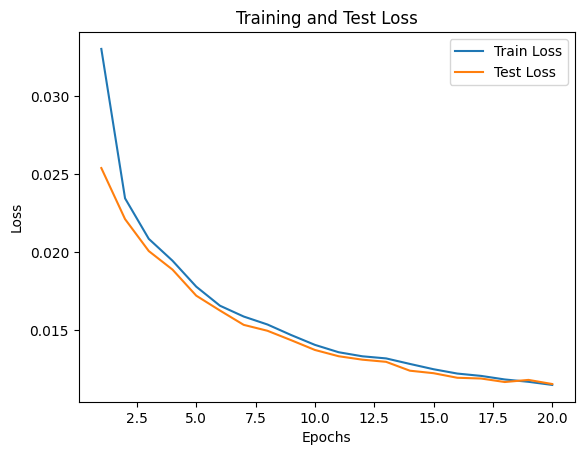

In [12]:
# ===================== YOUR CODE HERE ======================
LAE_RECON_Trainer.plot_results() 
# LAE_RECON_Trainer.save_model()
# ===========================================================


<hr>

### <h1 style="text-align: left;">Visualize Results | <span style="color: #9370DB;">LAE</span></h1>

<hr>

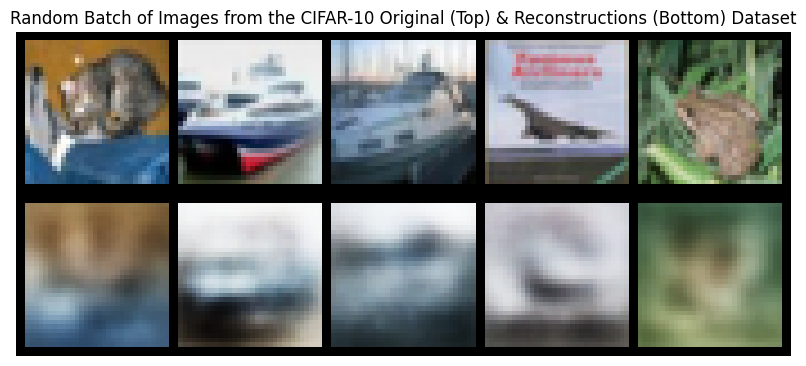

In [52]:
# ===================== YOUR CODE HERE ======================
LAE_RECON_Trainer.visualise_reconstructions(5)

# ===========================================================


Overall_Results["Task 1"] = {
    "Train Loss (Last Epoch)": 0.0115,
    "Test Loss (Last Epoch)": 0.0115,
    "Train Loss (Minimum)": 0.0115,
    "Test Loss (Minimum)": 0.0115,
}

<hr>

### <h1 style="text-align: left;">Task 1 | <span style="color: #9370DB;">End</span></h1>

<hr>

<hr>

## <h1 style="text-align: left;"><b>Task 2: Convolutional Autoencoder Reconstruction | <span style="color: #9370DB;">CIFAR-10</span></b></h1>

<hr>


### <h2>1. In a Convolutional Autoencoder (CAE):</h2>

<ul>
    <li>The <b>encoder</b> primarily uses <code>Conv2d</code> and <code>MaxPool2d</code> layers for feature extraction and dimensionality reduction.</li>
    <li>The <b>decoder</b> utilizes <code>ConvTranspose2d</code> to upsample and reconstruct the original image.</li>
</ul>

<hr>

<h2>2. Convolutional Layers in a Convolutional Autoencoder</h2>

<table border="1" cellpadding="10" cellspacing="0" width="100%">
    <tr style="background-color:rgb(60, 60, 60);">
        <th style="text-align: left;">Layer</th>
        <th style="text-align: left;">Function</th>
    </tr>
    <tr>
        <td><b>Conv2d</b></td>
        <td>Extracts spatial features from the input image by applying filters.</td>
    </tr>
    <tr>
        <td><b>MaxPool2d</b></td>
        <td>Downsamples feature maps to reduce spatial dimensions while preserving key information.</td>
    </tr>
    <tr>
        <td><b>ConvTranspose2d</b></td>
        <td>Upsamples the compressed feature maps to reconstruct the original image.</td>
    </tr>
</table>

<p>You can read the PyTorch documentation aswell for more information!</p>

<hr>

<h2>3. Understanding Conv2d and ConvTranspose2d</h2>

<h3>Conv2d</h3>
<p>A <b>2D Convolutional Layer</b> applies filters (kernels) to the input image to extract spatial patterns such as edges and textures.</p>
<p><b>Syntax:</b></p>
<pre style="background-color:rgb(60, 60, 60); padding: 10px; border-radius: 5px;">
nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding)
</pre>

<ul>
    <li><b>in_channels:</b> Number of input channels (e.g., 3 for RGB images).</li>
    <li><b>out_channels:</b> Number of filters applied to extract features.</li>
    <li><b>kernel_size:</b> Size of the filter (e.g., 3×3).</li>
    <li><b>stride:</b> Step size for moving the filter across the image.</li>
    <li><b>padding:</b> Adds zero-padding to maintain spatial dimensions.</li>
</ul>

<h3>ConvTranspose2d</h3>
<p>The <b>ConvTranspose2d</b> layer performs the reverse operation of <b>Conv2d</b>, increasing the spatial dimensions of the feature maps.</p>
<p><b>Syntax:</b></p>
<pre style="background-color:rgb(60, 60, 60); padding: 10px; border-radius: 5px;">
nn.ConvTranspose2d(in_channels, out_channels, kernel_size, stride, padding)
</pre>

<ul>
    <li><b>in_channels:</b> Number of channels from the latent space.</li>
    <li><b>out_channels:</b> Number of filters used to reconstruct the image.</li>
    <li><b>kernel_size:</b> Size of the upsampling filter.</li>
    <li><b>stride:</b> Determines how much the feature maps expand.</li>
    <li><b>padding:</b> Adjusts spatial dimensions for accurate reconstruction.</li>
</ul>

<hr>

<hr>

### <h1 style="text-align: left;">Class | <span style="color: #9370DB;">Convolutional AutoEncoder</span></h1>

<hr>

In [14]:
class ConvolutionalAutoencoderRecon(nn.Module):
    def __init__(self):
        super(ConvolutionalAutoencoderRecon, self).__init__()
        # ===================== YOUR CODE HERE =====================
        
        self.encoder = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, stride=2, padding=1), 
            nn.ReLU(),
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=2, padding=1),
            nn.ReLU()
        )
        
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(in_channels=256, out_channels=128, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(in_channels=128, out_channels=64, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(in_channels=64, out_channels=3, kernel_size=3, stride=2, padding=1, output_padding=1), 
            nn.Sigmoid() 
        )
        
        # ===========================================================
        
    def forward(self, x):
        # ===================== YOUR CODE HERE =====================
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        # ===========================================================
        return decoded, encoded

<hr>

### <h1 style="text-align: left;">Class | <span style="color: #9370DB;">CAERecon</span></h1>

<hr>

### <p><strong>Overview:</strong><br>
The <code>CAERecon</code> is a class designed to facilitate the training, evaluation, and visualization of a <strong>Convolutional Autoencoder (CAE)</strong> model. It handles the training loop, computes losses, performs model evaluations after each epoch, and enables visualization of reconstructions to monitor model progress. The class also provides methods to save and load the model at any point.</p>

---

<h3>Constructor (<code>__init__</code>):</h3>
<p>The constructor initializes key components for training, evaluation, and visualization:</p>
<ul>
  <li><code>model (nn.Module)</code>: The Autoencoder model to be trained.</li>
  <li><code>train_loader (DataLoader)</code>: The training dataset loader.</li>
  <li><code>test_loader (DataLoader)</code>: The test dataset loader.</li>
  <li><code>lr (float)</code>: Learning rate for the optimizer (default is <code>0.001</code>).</li>
  <li><code>num_epochs (int)</code>: Number of epochs for training (default is <code>20</code>).</li>
  <li><code>device (str or None)</code>: Specifies the device for computation (e.g., 'cuda', 'mps', 'cpu'). It auto-detects if set to <code>None</code>.</li>
  <li><code>imshow_func (function or None)</code>: An optional function for visualizing images (reconstructed outputs from the model). This allows for custom image visualization logic, if needed.</li>
</ul>
<p>The constructor sets up the model, loss function (<code>MSELoss</code>), optimizer (<code>Adam</code>), and prepares lists for storing training and test losses. It also prints a summary of the model.</p>

---

<h3>Methods:</h3>

<h4>1. Training (<code>train</code>)</h4>
<p><strong>Purpose:</strong> Trains the autoencoder model over a specified number of epochs.</p>
<p><strong>Workflow:</strong> Iterates over training data, performing a forward pass, calculating loss, and updating model weights using backpropagation. After every epoch, the method prints the training loss and calls the <code>evaluate</code> method to assess the model on the test dataset.</p>
<p><strong>Outputs:</strong> Prints the average training loss at the end of each epoch.</p>

<h4>2. Evaluation (<code>evaluate</code>)</h4>
<p><strong>Purpose:</strong> Evaluates the trained model's performance on the test dataset after each epoch.</p>
<p><strong>Workflow:</strong> The model is set to evaluation mode (<code>eval</code>), and predictions are made on the test set. The <strong>test loss</strong> is computed by comparing the model's outputs with the ground truth.</p>
<p><strong>Outputs:</strong> Prints the test loss for the current epoch.</p>

<h4>3. Model Saving (<code>save_model</code>)</h4>
<p><strong>Purpose:</strong> Saves the trained model to a file.</p>
<p><strong>Path:</strong> The model is saved to the provided path (default is <code>/models/cae_model.pth</code>).</p>
<p><strong>Outputs:</strong> Prints a message confirming the model has been saved to the specified path.</p>

<h4>4. Model Loading (<code>load_model</code>)</h4>
<p><strong>Purpose:</strong> Loads a pre-trained model from a file.</p>
<p><strong>Path:</strong> Loads the model from the specified path (default is <code>/models/cae_model.pth</code>).</p>
<p><strong>Outputs:</strong> Prints a message confirming the model has been loaded from the specified path.</p>

<h4>5. Plotting Results (<code>plot_results</code>)</h4>
<p><strong>Purpose:</strong> Plots the training and test losses over the course of training.</p>
<p><strong>Workflow:</strong> After training, this method visualizes the losses for both training and test sets over all epochs.</p>
<p><strong>Outputs:</strong> Displays a plot with two lines: one for <strong>training loss</strong> and one for <strong>test loss</strong>, enabling a comparison of performance.</p>

<h4>6. Visualization of Reconstructions (<code>visualize_reconstructions</code>)</h4>
<p><strong>Purpose:</strong> Visualizes the <strong>original images</strong> alongside their <strong>reconstructed outputs</strong> from the trained model.</p>
<p><strong>Workflow:</strong> The model is set to evaluation mode (<code>eval</code>). A batch of test images is passed through the model to obtain reconstructions. A few images (specified by <code>num_images</code>) are displayed, where the first image in each pair is the ground truth and the second is the reconstruction.</p>
<p><strong>Outputs:</strong> Displays side-by-side visualizations of original and reconstructed images for comparison.</p>

---

<h3>Example Usage:</h3>

```python
# Instantiate the CAERecon class
trainer = CAERecon(model, train_loader, test_loader, lr=0.001, num_epochs=20, device='cuda')

# Start training
trainer.train()

# After training, plot the training and test losses
trainer.plot_results()

# Visualize the reconstructions from the test set
trainer.visualize_reconstructions(num_images=5)
```

---

<h3>Summary:</h3>
<p>The <code>CAERecon</code> class provides an end-to-end solution for training a <strong>Convolutional Autoencoder (CAE)</strong> model. It includes methods for:</p>
<ul>
  <li>Training and loss calculation</li>
  <li>Periodic evaluation and printing of test losses</li>
  <li>Visualizing reconstructed images alongside ground truth</li>
  <li>Saving and loading model weights</li>
</ul>
<p>This structure helps you monitor the model's progress at each epoch, assess performance, and visualize the model's reconstructions in a streamlined manner.</p>

---

<h3>Notes:</h3>
<ul>
  <li>The class is designed to be flexible and can accept a custom image visualization function (<code>imshow_func</code>) for visualizing the model's reconstructions.</li>
  <li>Loss values are tracked during training and evaluation for both training and test sets, enabling meaningful analysis of model performance over time.</li>
</ul>

In [15]:
class CAERecon:
    def __init__(self, model, train_loader, test_loader, lr=0.001, num_epochs=20, device=None, imshow_func=None):
        """
        Initializes the Convolutional Autoencoder Trainer.

        Args:
            model (nn.Module): The Autoencoder model.
            train_loader (DataLoader): Training dataset loader.
            test_loader (DataLoader): Test dataset loader.
            lr (float): Learning rate.
            num_epochs (int): Number of training epochs.
            device (str or None): 'mps' or 'cuda' or 'cpu', auto-detect if None.
            imshow_func (function or None): Function to visualize images (reconstructions).
        """
        self.name = "Convolutional Autoencoder (Reconstruction)"
        # ===================== YOUR CODE HERE =====================
        self.model = model
        self.train_loader = train_loader
        self.test_loader = test_loader
        self.lr = lr
        self.num_epochs = num_epochs
        self.device = device if device is not None else ("cuda" if torch.cuda.is_available() else "cpu")
        self.imshow_func = imshow_func

        self.model.to(self.device)
        self.criterion = nn.MSELoss()
        self.optimizer = optim.Adam(self.model.parameters(), lr=self.lr)
        self.train_losses = []
        self.test_losses = []
        # ===========================================================

    def train(self):
        """ 
        Trains the Autoencoder for a specified number of epochs.
        """
        # ===================== YOUR CODE HERE ======================
        self.model.train()
        for epoch in range(self.num_epochs):
            total_loss = 0.0
            
            for images, _ in self.train_loader:
                images = images.to(self.device)
                self.optimizer.zero_grad()
                outputs, _ = self.model(images)
                loss = self.criterion(outputs, images)
                loss.backward()
                self.optimizer.step()
                total_loss += loss.item()
                
            avg_loss = total_loss / len(self.train_loader)
            self.train_losses.append(avg_loss)
            
            print(f"Epoch {epoch+1}/{self.num_epochs} - Train Loss: {avg_loss:.4f}")
            self.evaluate(epoch)
        # =========================================================== 

    def evaluate(self, epoch, train=True):
        """ 
        Evaluates the Autoencoder model on the test dataset after each epoch.

        Args:
            epoch (int): Current training epoch.
        """
        # ===================== YOUR CODE HERE ======================
        self.model.eval()
        total_loss = 0.0
        
        with torch.no_grad():
            for images, _ in self.test_loader:
                images = images.to(self.device)
                outputs, _ = self.model(images)
                loss = self.criterion(outputs, images)
                total_loss += loss.item()
                
        avg_loss = total_loss / len(self.test_loader)
        self.test_losses.append(avg_loss)
        
        print(f"Epoch {epoch+1}/{self.num_epochs} - Test Loss: {avg_loss:.4f}")
        self.model.train()
        # =========================================================== 

    def save_model(self, path="/models/CAE_RECON.pth"):
        """ 
        Saves the trained model to a specified file path.

        Args:
            path (str): File path to save the model.
        """
        torch.save(self.model.state_dict(), path)
        print(f"Model saved to: {path}")

    def load_model(self, path="/models/CAE_RECON.pth"):
        """ 
        Loads the trained model from a saved file.

        Args:
            path (str): File path of the saved model.
        """
        self.model.load_state_dict(torch.load(path, map_location=self.device))
        self.model.to(self.device)
        print(f"Model loaded from: {path}")

    def plot_results(self):
        """ 
        Plots the training and test loss over epochs.
        """
        # ===================== YOUR CODE HERE ======================
        plt.figure(figsize=(10, 5))
        plt.plot(range(1, len(self.train_losses)+1), self.train_losses, label="Train Loss")
        plt.plot(range(1, len(self.test_losses)+1), self.test_losses, label="Test Loss")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title("Training and Test Loss")
        plt.legend()
        plt.show()
        # ===========================================================

    def visualize_reconstructions(self, num_images=5):
        """ 
        Visualizes the original and reconstructed images.

        Args:
            num_images (int): Number of images to display.
        """
        # ===================== YOUR CODE HERE ======================
        self.model.eval()
        batch = next(iter(self.test_loader))
        images, _ = batch
        images = images.to(self.device)[:num_images]
        with torch.no_grad():
            outputs, _ = self.model(images)
        images = images.cpu()
        outputs = outputs.cpu()
        
        orig_grid = make_grid(images, nrow=num_images, padding=2)
        recon_grid = make_grid(outputs, nrow=num_images, padding=2)

        combined_grid = torch.cat([orig_grid, recon_grid], dim=1)
        self.imshow_func(combined_grid.cpu(), "Original (Top) & Reconstructed (Bottom)")
        # ===========================================================
        
    def create_dataset(self):
        """ 
        Creates a dataset of reconstructed images for further analysis or classification.
        
        Returns:
            DataLoader: A DataLoader containing reconstructed images and labels.
        """
        # ===================== YOUR CODE HERE ======================
        reconstructed_images = []
        labels = []

        self.model.eval()
        with torch.no_grad():
            for batch in self.test_loader:
                images, lbls = batch
                images = images.to(self.device)
                outputs, _ = self.model(images)
                reconstructed_images.append(outputs.cpu())
                labels.append(lbls)

        reconstructed_images = torch.cat(reconstructed_images, dim = 0)
        labels = torch.cat(labels, dim = 0)

        dataset = torch.utils.data.TensorDataset(reconstructed_images, labels)
        return torch.utils.data.DataLoader(dataset, batch_size=self.test_loader.batch_size, shuffle = False)

        # =========================================================== 

<hr>

### <h1 style="text-align: left;">Model Setup | <span style="color: #9370DB;">CAE</span></h1>

<hr>

In [16]:
CAE_RECON_Model = ConvolutionalAutoencoderRecon()
CAE_RECON_Trainer = CAERecon(
    model = CAE_RECON_Model,
    train_loader = CIFAR_10_trainloader,
    test_loader = CIFAR_10_testloader,
    lr = 0.001,
    num_epochs = 10,
    imshow_func = imshow
)

<hr>

### <h1 style="text-align: left;">Training | <span style="color: #9370DB;">CAE</span></h1>

<hr>

In [17]:
# ===================== YOUR CODE HERE ======================
CAE_RECON_Trainer.train()
# ===========================================================

Epoch 1/10 - Train Loss: 0.0125
Epoch 1/10 - Test Loss: 0.0055
Epoch 2/10 - Train Loss: 0.0044
Epoch 2/10 - Test Loss: 0.0034
Epoch 3/10 - Train Loss: 0.0030
Epoch 3/10 - Test Loss: 0.0052
Epoch 4/10 - Train Loss: 0.0024
Epoch 4/10 - Test Loss: 0.0020
Epoch 5/10 - Train Loss: 0.0021
Epoch 5/10 - Test Loss: 0.0019
Epoch 6/10 - Train Loss: 0.0018
Epoch 6/10 - Test Loss: 0.0015
Epoch 7/10 - Train Loss: 0.0016
Epoch 7/10 - Test Loss: 0.0019
Epoch 8/10 - Train Loss: 0.0015
Epoch 8/10 - Test Loss: 0.0015
Epoch 9/10 - Train Loss: 0.0014
Epoch 9/10 - Test Loss: 0.0012
Epoch 10/10 - Train Loss: 0.0013
Epoch 10/10 - Test Loss: 0.0011


<hr>

### <h1 style="text-align: left;">Plot Results | <span style="color: #9370DB;">CAE</span></h1>

<hr>

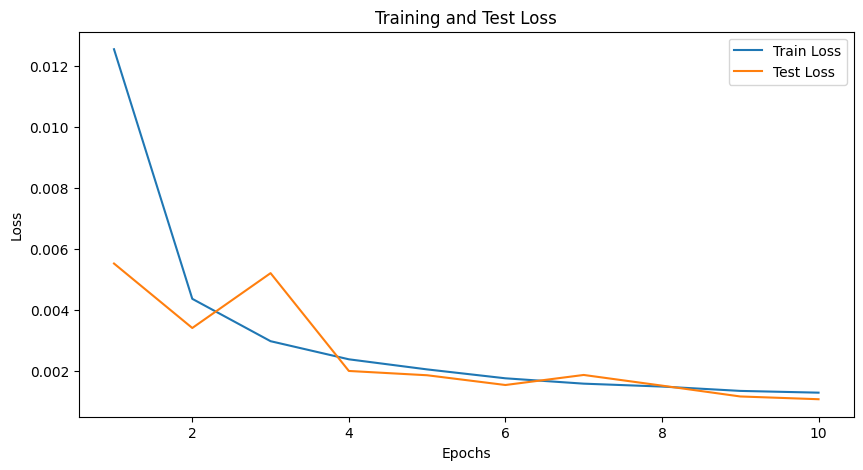

In [18]:
# ===================== YOUR CODE HERE ======================
CAE_RECON_Trainer.plot_results()
# ===========================================================

<hr>

### <h1 style="text-align: left;">Visualize Results | <span style="color: #9370DB;">CAE</span></h1>

<hr>

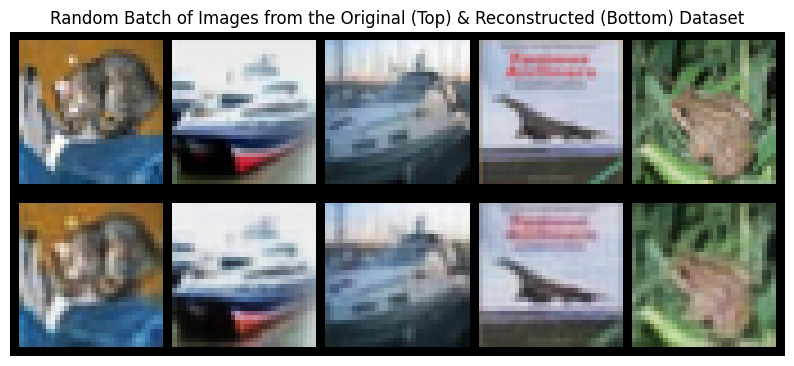

In [53]:
# ===================== YOUR CODE HERE ======================
CAE_RECON_Trainer.visualize_reconstructions(5)
# ===========================================================


Overall_Results["Task 2"] = {
    "Train Loss (Last Epoch)": 0.0013,
    "Test Loss (Last Epoch)": 0.0011,
    "Train Loss (Minimum)": 0.0013,
    "Test Loss (Minimum)": 0.0011,
}

<hr>

## <h1 style="text-align: left;"><b>Task 3: Linear Autoencoder Denoising | <span style="color: #9370DB;">MNIST</span></b></h1>

<hr>

<hr>

### <h1 style="text-align: left;">Class | <span style="color: #9370DB;">Linear Autoencoder</span></h1>

<hr>

In [20]:
class LinearAutoencoderDenoise(nn.Module):
    def __init__(self):
        super(LinearAutoencoderDenoise, self).__init__()
        # ===================== YOUR CODE HERE =====================
        
        self.encoder = nn.Sequential(
            
            nn.Linear(1 * 28 * 28, 256),
            nn.ReLU(),
                                
            nn.Linear(256, 128),
            nn.ReLU(),

            nn.Linear(128, 64),
            nn.ReLU(),

            nn.Linear(64, 32)
        )

        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(),
            
            nn.Linear(64, 128),
            nn.ReLU(),
            
            nn.Linear(128, 256),
            nn.ReLU(),
            
            nn.Linear(256, 1 * 28 * 28),
            nn.Sigmoid(),
        )
        
        # ===========================================================
        
    def forward(self, x):
        # ===================== YOUR CODE HERE =====================
        x = x.view(x.size(0), -1) 
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        decoded = decoded.view(x.size(0), 1, 28, 28)
        
        # ===========================================================
        return decoded, encoded

<hr>

### <h1 style="text-align: left;">Class | <span style="color: #9370DB;">LAEDenoise</span></h1>

<hr>

In [21]:
class LAEDenoise:
    def __init__(self, model, train_loader, test_loader, lr=0.001, num_epochs=20, device=None, imshow_func=None):
        """
        Initializes the Linear Autoencoder Trainer for Denoising.

        Args:
            model (nn.Module): The Autoencoder model.
            train_loader (DataLoader): Training dataset loader.
            test_loader (DataLoader): Test dataset loader.
            lr (float): Learning rate.
            num_epochs (int): Number of training epochs.
            device (str or None): 'mps' or 'cuda' or 'cpu', auto-detect if None.
            imshow_func (function or None): Function to visualize images (denoised reconstructions).
        """
        self.name = "Linear Autoencoder (Denoising)"
        # ===================== YOUR CODE HERE =====================
        self.model = model
        self.train_loader = train_loader
        self.test_loader = test_loader
        self.lr = lr
        self.num_epochs = num_epochs
        self.device = device if device is not None else ("cuda" if torch.cuda.is_available() else "cpu")
        self.imshow_func = imshow_func
        self.model.to(self.device)
        self.criterion = nn.MSELoss()
        self.optimizer = optim.Adam(self.model.parameters(), lr=self.lr)
        self.train_losses = []
        self.test_losses = []
        # ===========================================================

    def train(self):
        """ 
        Trains the Autoencoder for a specified number of epochs.
        """
        # ===================== YOUR CODE HERE ======================
        self.model.train()
        for epoch in range(self.num_epochs):
            total_loss = 0.0
            
            for noisy_imgs, _ in self.train_loader:
                noisy_imgs = noisy_imgs.to(self.device)
                self.optimizer.zero_grad()
                reconstructed, _ = self.model(noisy_imgs)
                loss = self.criterion(noisy_imgs, reconstructed)
                loss.backward()
                self.optimizer.step()
                total_loss += loss.item()
                
            avg_loss = total_loss / len(self.train_loader)
            self.train_losses.append(avg_loss)
            
            print(f"Epoch {epoch+1}/{self.num_epochs} - Train Loss: {avg_loss:.4f}")
            self.evaluate(epoch)
        # =========================================================== 

    def evaluate(self, epoch, train=True):
        """ 
        Evaluates the Autoencoder model on the test dataset after each epoch.

        Args:
            epoch (int): Current training epoch.
        """
        # ===================== YOUR CODE HERE ======================
        self.model.eval()
        total_loss = 0.0
    
        with torch.no_grad():
            for noisy_imgs, _ in self.test_loader:
                noisy_imgs = noisy_imgs.to(self.device)
                reconstructed, _ = self.model(noisy_imgs)
                loss = self.criterion(noisy_imgs, reconstructed)
                total_loss += loss.item()
                
        avg_loss = total_loss / len(self.test_loader)
        self.test_losses.append(avg_loss)
        
        print(f"Epoch {epoch+1}/{self.num_epochs} - Test Loss: {avg_loss:.4f}")
        self.model.train()
        # =========================================================== 

    def save_model(self, path="/models/LAE_DENOISE.pth"):
        """ 
        Saves the trained model to a specified file path.

        Args:
            path (str): File path to save the model.
        """
        torch.save(self.model.state_dict(), path)
        print(f"Model saved to: {path}")

    def load_model(self, path="/models/LAE_DENOISE.pth"):
        """ 
        Loads the trained model from a saved file.

        Args:
            path (str): File path of the saved model.
        """
        self.model.load_state_dict(torch.load(path, map_location=self.device))
        self.model.to(self.device)
        print(f"Model loaded from: {path}")

    def plot_results(self):
        """ 
        Plots the training and test loss over epochs.
        """
        # ===================== YOUR CODE HERE =====================
        plt.figure(figsize=(10, 5))
        plt.plot(range(1, len(self.train_losses)+1), self.train_losses, label="Train Loss")
        plt.plot(range(1, len(self.test_losses)+1), self.test_losses, label="Test Loss")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title("Training and Test Loss")
        plt.legend()
        plt.show()
        # ===========================================================

    def visualize_denoising(self, num_images=5):
        """ 
        Visualizes the original and denoised images.

        Args:
            num_images (int): Number of images to display.
        """
        # ===================== YOUR CODE HERE =====================
        self.model.eval()
        batch = next(iter(self.test_loader))
        noisy_imgs, _ = batch
        noisy_imgs = noisy_imgs.to(self.device)[:num_images]
        
        with torch.no_grad():
            outputs, _ = self.model(noisy_imgs)
        
        noisy_imgs = noisy_imgs.cpu()
        outputs = outputs.cpu()
        
        grid_noisy = make_grid(noisy_imgs, nrow=num_images, padding=2)
        grid_denoised = make_grid(outputs, nrow=num_images, padding=2)
        combined_grid = torch.cat([grid_noisy, grid_denoised], dim=1)
        self.imshow_func(combined_grid.cpu(), "Noisy (Left), Denoised (Right)")
        # ===========================================================
    def create_dataset(self):
        """ 
        Creates a dataset of reconstructed images for further analysis or classification.
        
        Returns:
            DataLoader: A DataLoader containing reconstructed images and labels.
        """
        # ===================== YOUR CODE HERE ======================
        denoised_images = []
        targets_list = []
        self.model.eval()
        
        with torch.no_grad():
            for noisy_imgs, labels in self.test_loader:
                noisy_imgs = noisy_imgs.to(self.device)
                outputs, _ = self.model(noisy_imgs)
                denoised_images.append(outputs.cpu())
                targets_list.append(labels.cpu())
                
        denoised_images = torch.cat(denoised_images, dim=0)
        targets = torch.cat(targets_list, dim=0)
        dataset = torch.utils.data.TensorDataset(denoised_images, targets)
        
        return torch.utils.data.DataLoader(dataset, batch_size=self.test_loader.batch_size, shuffle=False)
        # =========================================================== 

<hr>

### <h1 style="text-align: left;">Model Setup | <span style="color: #9370DB;">LAE</span></h1>

<hr>

In [22]:
LAE_DENOISE_Model = LinearAutoencoderDenoise()
LAE_DENOISE_Trainer = LAEDenoise(
    model = LAE_DENOISE_Model,
    train_loader = MNIST_trainloader_noisy,
    test_loader = MNIST_testloader_noisy,
    lr = 0.001,
    num_epochs = 20,
    imshow_func = imshow
)

<hr>

### <h1 style="text-align: left;">Training | <span style="color: #9370DB;">LAE</span></h1>

<hr>

In [23]:
# ===================== YOUR CODE HERE ======================
LAE_DENOISE_Trainer.train()
# ===========================================================


Epoch 1/20 - Train Loss: 0.3017
Epoch 1/20 - Test Loss: 0.2832
Epoch 2/20 - Train Loss: 0.2783
Epoch 2/20 - Test Loss: 0.2746
Epoch 3/20 - Train Loss: 0.2732
Epoch 3/20 - Test Loss: 0.2711
Epoch 4/20 - Train Loss: 0.2699
Epoch 4/20 - Test Loss: 0.2680
Epoch 5/20 - Train Loss: 0.2674
Epoch 5/20 - Test Loss: 0.2661
Epoch 6/20 - Train Loss: 0.2656
Epoch 6/20 - Test Loss: 0.2646
Epoch 7/20 - Train Loss: 0.2643
Epoch 7/20 - Test Loss: 0.2631
Epoch 8/20 - Train Loss: 0.2626
Epoch 8/20 - Test Loss: 0.2615
Epoch 9/20 - Train Loss: 0.2611
Epoch 9/20 - Test Loss: 0.2601
Epoch 10/20 - Train Loss: 0.2598
Epoch 10/20 - Test Loss: 0.2591
Epoch 11/20 - Train Loss: 0.2591
Epoch 11/20 - Test Loss: 0.2584
Epoch 12/20 - Train Loss: 0.2584
Epoch 12/20 - Test Loss: 0.2579
Epoch 13/20 - Train Loss: 0.2578
Epoch 13/20 - Test Loss: 0.2574
Epoch 14/20 - Train Loss: 0.2574
Epoch 14/20 - Test Loss: 0.2569
Epoch 15/20 - Train Loss: 0.2568
Epoch 15/20 - Test Loss: 0.2566
Epoch 16/20 - Train Loss: 0.2565
Epoch 16/2

<hr>

### <h1 style="text-align: left;">Plot Results | <span style="color: #9370DB;">LAE</span></h1>

<hr>

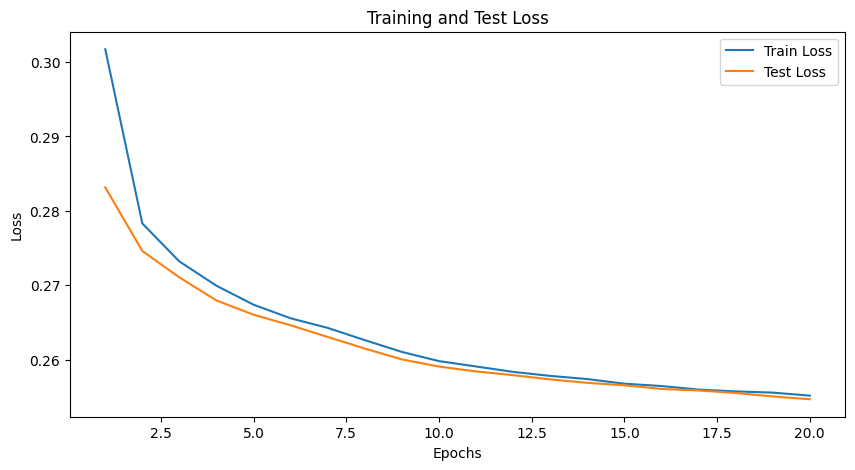

In [24]:
# ===================== YOUR CODE HERE ======================
LAE_DENOISE_Trainer.plot_results()
# ===========================================================

<hr>

### <h1 style="text-align: left;">Visualize Results | <span style="color: #9370DB;">LAE</span></h1>

<hr>

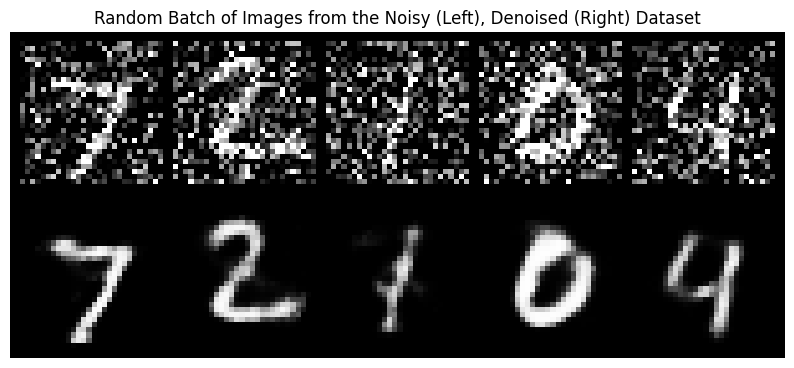

In [54]:
# ===================== YOUR CODE HERE ======================
LAE_DENOISE_Trainer.visualize_denoising(5)   
# ===========================================================

Overall_Results["Task 3"] = {
    "Train Loss (Last Epoch)": 0.2552,
    "Test Loss (Last Epoch)": 0.2547,
    "Train Loss (Minimum)": 0.2552,
    "Test Loss (Minimum)": 0.2547,
}

<hr>

### <h1 style="text-align: left;">Task 3 | <span style="color: #9370DB;">End</span></h1>

<hr>

<hr>

## <h1 style="text-align: left;"><b>Task 4: Convolutional Autoencoder Denoising | <span style="color: #9370DB;">MNIST</span></b></h1>

<hr>

<hr>

### <h1 style="text-align: left;">Class | <span style="color: #9370DB;">Convolutional AutoEncoder</span></h1>

<hr>

In [26]:
class ConvolutionalAutoencoderDenoise(nn.Module):
    def __init__(self):
        super(ConvolutionalAutoencoderDenoise, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(in_channels = 1, out_channels = 32, kernel_size=3, stride=2, padding=1),  
            nn.ReLU(),
            
            nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size=3, stride=2, padding=1),  
            nn.ReLU(),
            
            nn.Conv2d(in_channels = 64, out_channels = 128, kernel_size=3, stride=2, padding=1), 
            nn.ReLU(),
            
            nn.Conv2d(in_channels = 128, out_channels = 256, kernel_size=3, stride=2, padding=1),
            nn.ReLU()
        )
        
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(in_channels = 256, out_channels = 128, kernel_size=3, stride=2, padding=1, output_padding=1), 
            nn.ReLU(),

            nn.ConvTranspose2d(in_channels = 128, out_channels = 64, kernel_size=3, stride=2, padding=1, output_padding=0),
            nn.ReLU(),


            nn.ConvTranspose2d(in_channels = 64, out_channels = 32, kernel_size=3, stride=2, padding=1, output_padding=1),  
            nn.ReLU(),

            nn.ConvTranspose2d(in_channels = 32, out_channels = 1, kernel_size=3, stride=2, padding=1, output_padding=1), 
            nn.Sigmoid()
        )
                
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded, encoded

<hr>

### <h1 style="text-align: left;">Class | <span style="color: #9370DB;">CAEDenoise</span></h1>

<hr>

In [27]:
class CAEDenoise:
    def __init__(self, model, train_loader, test_loader, lr=0.001, num_epochs=20, device=None, imshow_func=None):
        """
        Initializes the Convolutional Autoencoder Trainer for Denoising.

        Args:
            model (nn.Module): The Autoencoder model.
            train_loader (DataLoader): Training dataset loader.
            test_loader (DataLoader): Test dataset loader.
            lr (float): Learning rate.
            num_epochs (int): Number of training epochs.
            device (str or None): 'mps' or 'cuda' or 'cpu', auto-detect if None.
            imshow_func (function or None): Function to visualize images (denoised reconstructions).
        """
        self.name = "Convolutional Autoencoder (Denoising)"
        # ===================== YOUR CODE HERE ======================
        self.model = model
        self.train_loader = train_loader
        self.test_loader = test_loader
        self.lr = lr
        self.num_epochs = num_epochs
        self.device = device if device is not None else ("cuda" if torch.cuda.is_available() else "cpu")
        self.imshow_func = imshow_func
        self.model.to(self.device)
        self.criterion = nn.MSELoss()
        self.optimizer = optim.Adam(self.model.parameters(), lr=self.lr)
        self.train_losses = []
        self.test_losses = []
        # =========================================================== 

    def train(self):
        """ 
        Trains the Autoencoder for a specified number of epochs.
        """
        # ===================== YOUR CODE HERE ======================
        self.model.train()
        for epoch in range(self.num_epochs):
            total_loss = 0.0
            
            for noisy_imgs, _ in self.train_loader:
                noisy_imgs = noisy_imgs.to(self.device)
                self.optimizer.zero_grad()
                reconstructed, _ = self.model(noisy_imgs)
                loss = self.criterion(noisy_imgs, reconstructed)
                loss.backward()
                self.optimizer.step()
                total_loss += loss.item()
                
            avg_loss = total_loss / len(self.train_loader)
            self.train_losses.append(avg_loss)
            
            print(f"Epoch {epoch+1}/{self.num_epochs} - Train Loss: {avg_loss:.4f}")
            self.evaluate(epoch)
        # =========================================================== 

    def evaluate(self, epoch, train=True):
        """ 
        Evaluates the Autoencoder model on the test dataset after each epoch.

        Args:
            epoch (int): Current training epoch.
        """
        # ===================== YOUR CODE HERE ======================
        self.model.eval()
        total_loss = 0.0
    
        with torch.no_grad():
            for noisy_imgs, _ in self.test_loader:
                noisy_imgs = noisy_imgs.to(self.device)
                reconstructed, _ = self.model(noisy_imgs)
                loss = self.criterion(noisy_imgs, reconstructed)
                total_loss += loss.item()
                
        avg_loss = total_loss / len(self.test_loader)
        self.test_losses.append(avg_loss)
        
        print(f"Epoch {epoch+1}/{self.num_epochs} - Test Loss: {avg_loss:.4f}")
        self.model.train()
        # =========================================================== 

    def save_model(self, path="/models/CAE_DENOISE.pth"):
        """ 
        Saves the trained model to a specified file path.

        Args:
            path (str): File path to save the model.
        """
        torch.save(self.model.state_dict(), path)
        print(f"Model saved to: {path}")

    def load_model(self, path="/models/CAE_DENOISE.pth"):
        """ 
        Loads the trained model from a saved file.

        Args:
            path (str): File path of the saved model.
        """
        self.model.load_state_dict(torch.load(path, map_location=self.device))
        self.model.to(self.device)
        print(f"Model loaded from: {path}")

    def plot_results(self):
        """ 
        Plots the training and test loss over epochs.
        """
        # ===================== YOUR CODE HERE =====================
        plt.figure(figsize=(10, 5))
        plt.plot(range(1, len(self.train_losses)+1), self.train_losses, label="Train Loss")
        plt.plot(range(1, len(self.test_losses)+1), self.test_losses, label="Test Loss")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title("Training and Test Loss")
        plt.legend()
        plt.show()
        # ===========================================================

    def visualize_denoising(self, num_images=5):
        """ 
        Visualizes the original and denoised images.

        Args:
            num_images (int): Number of images to display.
        """
        # ===================== YOUR CODE HERE =====================
        self.model.eval()
        batch = next(iter(self.test_loader))
        noisy_imgs, _ = batch
        noisy_imgs = noisy_imgs.to(self.device)[:num_images]
        
        with torch.no_grad():
            outputs, _ = self.model(noisy_imgs)
        
        noisy_imgs = noisy_imgs.cpu()
        outputs = outputs.cpu()
        
        grid_noisy = make_grid(noisy_imgs, nrow=num_images, padding=2)
        grid_denoised = make_grid(outputs, nrow=num_images, padding=2)
        combined_grid = torch.cat([grid_noisy, grid_denoised], dim=1)
        self.imshow_func(combined_grid.cpu(), "Noisy (Top), Denoised (Bottom)")
        # ===========================================================
        
    def create_dataset(self):
        """ 
        Creates a dataset of reconstructed images for further analysis or classification.
        
        Returns:
            DataLoader: A DataLoader containing reconstructed images and labels.
        """
        # ===================== YOUR CODE HERE ======================
        denoised_images = []
        targets_list = []
        self.model.eval()
        
        with torch.no_grad():
            for noisy_imgs, labels in self.test_loader:
                noisy_imgs = noisy_imgs.to(self.device)
                outputs, _ = self.model(noisy_imgs)
                denoised_images.append(outputs.cpu())
                targets_list.append(labels.cpu())
                
        denoised_images = torch.cat(denoised_images, dim=0)
        targets = torch.cat(targets_list, dim=0)
        dataset = torch.utils.data.TensorDataset(denoised_images, targets)
        
        return torch.utils.data.DataLoader(dataset, batch_size=self.test_loader.batch_size, shuffle=False)
        # =========================================================== 

<hr>

### <h1 style="text-align: left;">Model Setup | <span style="color: #9370DB;">CAE</span></h1>

<hr>

In [28]:
CAE_DENOISE_Model = ConvolutionalAutoencoderDenoise()
CAE_DENOISE_Trainer = CAEDenoise(
    model = CAE_DENOISE_Model,
    train_loader = MNIST_trainloader_noisy,
    test_loader = MNIST_testloader_noisy,
    lr = 0.0001,
    num_epochs = 3,
    imshow_func = imshow
)

<hr>

### <h1 style="text-align: left;">Training | <span style="color: #9370DB;">CAE</span></h1>

<hr>

In [29]:
# ===================== YOUR CODE HERE ======================
CAE_DENOISE_Trainer.train()        
# ===========================================================


Epoch 1/3 - Train Loss: 0.3131
Epoch 1/3 - Test Loss: 0.2810
Epoch 2/3 - Train Loss: 0.2693
Epoch 2/3 - Test Loss: 0.2605
Epoch 3/3 - Train Loss: 0.2563
Epoch 3/3 - Test Loss: 0.2516


<hr>

### <h1 style="text-align: left;">Plot Results | <span style="color: #9370DB;">CAE</span></h1>

<hr>

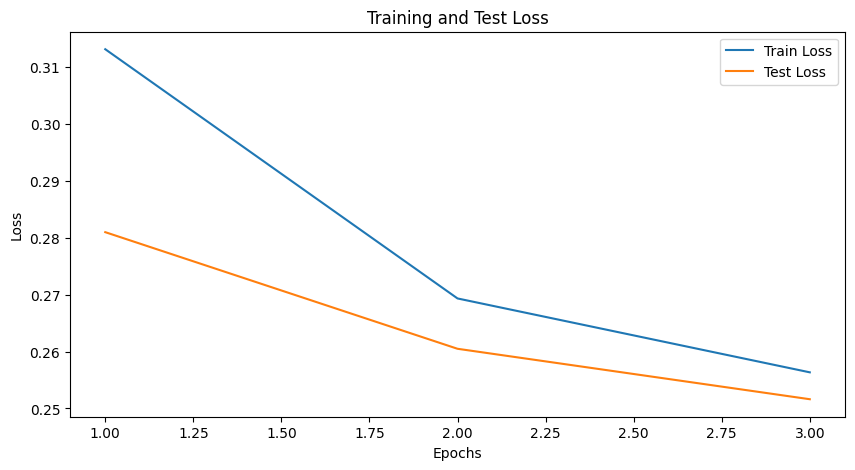

In [30]:
# ===================== YOUR CODE HERE ======================
CAE_DENOISE_Trainer.plot_results()
# ===========================================================


<hr>

### <h1 style="text-align: left;">Visualize Results | <span style="color: #9370DB;">CAE</span></h1>

<hr>

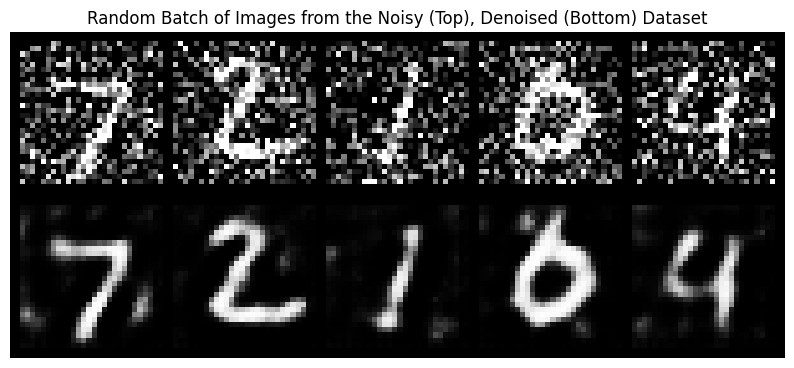

In [55]:
# ===================== YOUR CODE HERE ======================
CAE_DENOISE_Trainer.visualize_denoising(5)    
# ===========================================================

Overall_Results["Task 4"] = {
    "Train Loss (Last Epoch)": 0.2563,
    "Test Loss (Last Epoch)": 0.2516,
    "Train Loss (Minimum)": 0.2563,
    "Test Loss (Minimum)": 0.2516,
}

<hr>

### <h1 style="text-align: left;">Task 4 | <span style="color: #9370DB;">End</span></h1>

<hr>

<hr>

## <h1 style="text-align: left;"><b>Task 5: Image Classification (Reconstruction) | <span style="color: #9370DB;">CIFAR</span></b></h1>

<hr>

### <h2>1. CIFAR-10 Data Preparation:</h2>

<ul>
    <li><b>Original Data:</b> Use the original CIFAR-10 dataset.</li>
    <li><b>LAE Recon Data:</b> Feed the CIFAR-10 images through the LAE model to obtain the reconstructed images.</li>
    <li><b>CAE Recon Data:</b> Feed the CIFAR-10 images through the CAE model to obtain the reconstructed images.</li>
</ul>

<hr>

<h2>2. Classification Model:</h2>

<p>The task requires training a classifier on the following datasets:</p>
<ul>
    <li><b>Original CIFAR-10:</b> Directly train a classifier on the original CIFAR-10 dataset.</li>
</ul>

<hr>

<h2>3. Evaluation Metrics:</h2>

<p>The following metrics should be used to evaluate and compare the performance of the classifier on each test dataset:</p>

<ul>
    <li><b>Accuracy:</b> Percentage of correct classifications.</li>
    <li><b>Precision:</b> The proportion of positive identifications that were actually correct.</li>
    <li><b>Recall:</b> The proportion of actual positives that were correctly identified.</li>
    <li><b>F1-Score:</b> The harmonic mean of precision and recall, providing a balance between them.</li>
</ul>

<hr>

<h2>4. Comparison:</h2>

<p>For comparison:</p>

<ul>
    <li><b>Accuracy Comparison:</b> Compare the classification accuracy for the original data, LAE recon, and CAE recon.</li>
    <li><b>Confusion Matrices:</b> Plot confusion matrices for each classifier to visualize how the model performs across the different classes.</li>
</ul>

<hr>

<h2>5. Analysis:</h2>

<ul>
    <li><b>Feature Retention:</b> Analyze how well the LAE and CAE models preserve features of the original data during reconstruction.</li>
    <li><b>Impact of Reconstruction:</b> Determine the impact of reconstruction on classification accuracy and model performance.</li>
    <li><b>Best Reconstruction Model:</b> Conclude which reconstruction model (LAE or CAE) preserves the original data's classification features better.</li>
</ul>

<hr>

<h2>6. Visualization:</h2>

<ul>
    <li><b>Plot Metrics:</b> Plot the evaluation metrics (accuracy, precision, recall, F1-score) for each dataset to visualize performance differences.</li>
</ul>

In [32]:
# ================== Create Datasets ==================
LAERecon_dataloader = LAE_RECON_Trainer.create_dataset()
CAERecon_dataloader = CAE_RECON_Trainer.create_dataset()

for images, labels in LAERecon_dataloader:
    print("LAERecon_dataloader - images shape:", images.shape)
    print("LAERecon_dataloader - labels shape:", labels.shape)
    break

for images, labels in CAERecon_dataloader:
    print("CAERecon_dataloader - images shape:", images.shape)
    print("CAERecon_dataloader - labels shape:", labels.shape)
    break

LAERecon_dataloader - images shape: torch.Size([128, 3, 32, 32])
LAERecon_dataloader - labels shape: torch.Size([128])
CAERecon_dataloader - images shape: torch.Size([128, 3, 32, 32])
CAERecon_dataloader - labels shape: torch.Size([128])


<hr>

### <h1 style="text-align: left;"> Class | <span style="color: #9370DB;">Convolutional Neural Network Recon</span></h1>

<hr>

In [33]:
class CNNRecon(nn.Module):
    def __init__(self):
        super(CNNRecon, self).__init__()
        self.features = nn.Sequential(

            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            

            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            

            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        

        self.classifier = nn.Sequential(
            nn.Linear(128 * 4 * 4, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 10)
        )
        
    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1) 
        x = self.classifier(x)
        return x

<hr>

### <h1 style="text-align: left;"> Class | <span style="color: #9370DB;">CNN Classifier Recon</span></h1>

<hr>

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
class CNNClassifierRecon:
    def __init__(self, model, train_loader, test_loader, LAERecon_loader, CAERecon_loader, lr=0.001, num_epochs=20, device=None):
        """
        Initializes the CNN classifier for original and reconstructed datasets.

        Args:
            model (nn.Module): The CNN model.
            train_loader (DataLoader): Training dataset loader.
            test_loader (DataLoader): Test dataset loader.
            LAERecon_loader (DataLoader): DataLoader for LAE reconstructed images.
            CAERecon_loader (DataLoader): DataLoader for CAE reconstructed images.
            lr (float): Learning rate.
            num_epochs (int): Number of training epochs.
            device (str or None): 'cuda' or 'cpu', auto-detect if None.
        """
        self.name = "CNN Classifier Reconstruction"
        # ===================== YOUR CODE HERE ======================
        self.model = model
        self.train_loader = train_loader
        self.test_loader = test_loader
        self.LAERecon_loader = LAERecon_loader
        self.CAERecon_loader = CAERecon_loader
        self.lr = lr
        self.num_epochs = num_epochs
        self.device = device if device is not None else ("cuda" if torch.cuda.is_available() else "cpu")
        self.model.to(self.device)
        self.criterion = nn.CrossEntropyLoss()
        self.optimizer = optim.Adam(self.model.parameters(), lr=self.lr)
        self.train_losses = []
        self.test_losses = []
        # =========================================================== 
    
    def train(self):
        """
        Trains the CNN classifier for a specified number of epochs.
        """
        # ===================== YOUR CODE HERE ======================
        self.model.train()
        for epoch in range(self.num_epochs):
            total_loss = 0.0
            for images, labels in self.train_loader:
                images = images.to(self.device)
                labels = labels.to(self.device)
                self.optimizer.zero_grad()
                outputs = self.model(images)
                loss = self.criterion(outputs, labels)
                loss.backward()
                self.optimizer.step()
                total_loss += loss.item()
            
            avg_loss = total_loss / len(self.train_loader)
            self.train_losses.append(avg_loss)
            
            self.model.eval()
            all_train_preds = []
            all_train_labels = []
            with torch.no_grad():
                for images, labels in self.train_loader:
                    images = images.to(self.device)
                    labels = labels.to(self.device)
                    outputs = self.model(images)
                    preds = outputs.argmax(dim=1)
                    all_train_preds.extend(preds.cpu().numpy())
                    all_train_labels.extend(labels.cpu().numpy())
            train_accuracy = accuracy_score(all_train_labels, all_train_preds)
            
            print(f"Epoch {epoch+1}/{self.num_epochs} - Train Loss: {avg_loss:.4f} - Train Accuracy: {train_accuracy:.4f}")
            
            self.evaluate(self.test_loader, print_results=True, epoch=epoch+1)
            self.model.train()
        # =========================================================== 

    def evaluate(self, dataloader, print_results = True, epoch = None):
        """
        Evaluates the CNN model on a given dataset.

        Args:
            dataloader (DataLoader): The dataset loader to evaluate on.
            print_results (bool): Whether to print evaluation metrics.
            epoch (int or None): Current epoch number if evaluating during training.

        Returns:
            dict: Contains loss, accuracy, precision, recall, f1-score, and confusion matrix.
        """
        # ===================== YOUR CODE HERE ======================
        self.model.eval()
        total_loss = 0.0
        all_preds = []
        all_labels = []
        
        with torch.no_grad():
            for images, labels in dataloader:
                images = images.to(self.device)
                labels = labels.to(self.device)
                outputs = self.model(images)
                loss = self.criterion(outputs, labels)
                total_loss += loss.item()
                preds = outputs.argmax(dim=1)
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
                
        avg_loss = total_loss / len(dataloader)
        accuracy = accuracy_score(all_labels, all_preds)
        precision = precision_score(all_labels, all_preds, average='weighted', zero_division=0)
        recall = recall_score(all_labels, all_preds, average='weighted', zero_division=0)
        f1 = f1_score(all_labels, all_preds, average='weighted', zero_division=0)
        conf_mat = confusion_matrix(all_labels, all_preds)
        
        if print_results:
            if epoch is not None:
                print(f"Epoch {epoch} Evaluation:")
            print(f"Loss: {avg_loss:.4f}")
            print(f"Accuracy: {accuracy:.4f}")
            print(f"Precision: {precision:.4f}")
            print(f"Recall: {recall:.4f}")
            print(f"F1 Score: {f1:.4f}")
            print("Confusion Matrix:")
            print(conf_mat)
        
        metrics = {
            'loss': avg_loss,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'confusion_matrix': conf_mat
        }
        
        self.model.train()
        
        return metrics
        # =========================================================== 
    
    def save_model(self, path="CNN_RECON.pth"):
        """
        Saves the trained model to the specified file path.

        Args:
            path (str): File path to save the model.
        """
        torch.save(self.model.state_dict(), path)
        print(f"Model saved to {path}")
    
    def load_model(self, path="CNN_RECON.pth"):
        """
        Loads the trained model from the specified file path.

        Args:
            path (str): File path of the saved model.
        """
        self.model.load_state_dict(torch.load(path, map_location=self.device))
        self.model.to(self.device)
        print(f"Model loaded from {path}")

<hr>

### <h1 style="text-align: left;">Model Setup | <span style="color: #9370DB;">CNN Classifier Recon</span></h1>

<hr>

In [35]:
CNN_RECON_Model = CNNRecon()
CNN_CLASSIFIER_RECON_Trainer = CNNClassifierRecon(
    model = CNN_RECON_Model,
    train_loader = CIFAR_10_trainloader,
    test_loader = CIFAR_10_testloader,
    LAERecon_loader = LAERecon_dataloader,
    CAERecon_loader = CAERecon_dataloader,
    lr = 0.0007,
    num_epochs = 15,
)

<hr>

### <h1 style="text-align: left;">Training | <span style="color: #9370DB;">CNN Classifier Recon</span></h1>

<hr>

In [36]:
# ===================== YOUR CODE HERE ======================
CNN_CLASSIFIER_RECON_Trainer.train()
# ===========================================================


Epoch 1/15 - Train Loss: 1.4245 - Train Accuracy: 0.6070
Epoch 1 Evaluation:
Loss: 1.1286
Accuracy: 0.5929
Precision: 0.6061
Recall: 0.5929
F1 Score: 0.5773
Confusion Matrix:
[[747  46  64   5  17   3  14  16  38  50]
 [ 38 812   4   2   0   0   8   8   4 124]
 [111  13 424  40 176  32  99  66   8  31]
 [ 19  20  76 378 145  38 176  83  14  51]
 [ 47  10  80  26 590   1 104 120  12  10]
 [ 17   7  90 292 132 204  53 177   7  21]
 [  7   8  56  37  76   2 780  14   2  18]
 [ 21   6  25  30  84  14  14 754   3  49]
 [260 101   8  12  10   0  22   4 530  53]
 [ 47 183   5   6   5   1  11  21  11 710]]
Epoch 2/15 - Train Loss: 1.0608 - Train Accuracy: 0.6696
Epoch 2 Evaluation:
Loss: 0.9928
Accuracy: 0.6520
Precision: 0.6749
Recall: 0.6520
F1 Score: 0.6517
Confusion Matrix:
[[469  37 147  60  32  10  48  16 105  76]
 [  4 769   7  14   4  14  28   3   7 150]
 [ 29   3 512  73  85 118 138  23   3  16]
 [  4   5  52 473  28 242 155  23   2  16]
 [  8   4  66  79 554  38 183  59   6   3]
 [  

In [37]:
#Evaluating on LAER, CAER datasets
print("LAER Dataset Evaluation Results")
LAER_results = CNN_CLASSIFIER_RECON_Trainer.evaluate(dataloader = LAERecon_dataloader)
print("")
print("CAER Dataset Evaluation Results")
CAER_results = CNN_CLASSIFIER_RECON_Trainer.evaluate(dataloader = CAERecon_dataloader)

LAER Dataset Evaluation Results
Loss: 3.3212
Accuracy: 0.2553
Precision: 0.5123
Recall: 0.2553
F1 Score: 0.1807
Confusion Matrix:
[[201   0 271 102  41   0   0   0 385   0]
 [ 43  42 211 253  64   0   3   0 384   0]
 [ 26   0 513 237 164   0   2   0  58   0]
 [  6   0 265 637  61   0   1   1  29   0]
 [ 12   0 323 222 386   0   1   0  56   0]
 [  5   0 279 623  66   3   3   0  21   0]
 [  4   0 345 439 179   1  14   0  18   0]
 [ 18   0 445 284 202   2   2   6  41   0]
 [ 32   3  69 122  23   0   1   0 750   0]
 [ 33  14 267 268  26   0   2   0 389   1]]

CAER Dataset Evaluation Results
Loss: 0.8174
Accuracy: 0.7240
Precision: 0.7444
Recall: 0.7240
F1 Score: 0.7238
Confusion Matrix:
[[761  25  86  12   8   0   8   0  74  26]
 [ 17 890   3   4   1   0   8   0  24  53]
 [ 50   8 749  45  50  18  55   4  17   4]
 [ 30  13 139 618  31  49  73   8  25  14]
 [ 36   4 156  71 620  16  64  18  11   4]
 [ 21   4 126 278  37 465  41  13  11   4]
 [  4   9  66  50  18   2 839   1   6   5]
 [ 41  

<hr>

### <h1 style="text-align: left;">Results | <span style="color: #9370DB;">CNN Classifier Recon</span></h1>

<hr>

In [56]:
# ===================== YOUR CODE HERE ======================

# ===========================================================

Overall_Results["Task 5"] = {
    "Train Loss (Last Epoch)": 0.4004,
    "Test Loss (Last Epoch)": 0.8043,
    "Train Accuracy (Last Epoch)": 0.8442,
    "Test Accuracy (Last Epoch)": 0.7383,
    "Train Loss (Minimum)": 0.4004,
    "Test Loss (Minimum)": 0.6515,
    "Train Accuracy (Maximum)": 0.8826,
    "Test Accuracy (Maximum)": 0.7790,
}

<hr>

### <h1 style="text-align: left;">Analysis | <span style="color: #9370DB;">CNN Classifier Recon</span></h1>

<hr>

**Answer here:** The evaluation results reveal that the Convolutional Autoencoder (CAE) significantly outperforms the Linear Autoencoder (LAE) in preserving the original data’s features for classification. The CAE achieves a low loss (0.8174) and high accuracy (72.40%), along with robust precision, recall, and F1 scores, indicating that its convolutional layers better retain spatial and local information. In contrast, the LAE exhibits high loss (3.3212) and poor accuracy (25.53%), suggesting that the fully connected structure loses critical spatial relationships. Overall, the CAE preserves the classification-relevant features far more effectively than the LAE.

The quality of reconstruction has a huge impact on how well the CNN classifier is able to discern between the images. With the LAE dataset, the performance was poor and that can be directly linked to the blurry reconstructed images visualised above (end of task 1) whereas with the CAE dataset, the classifier was able to achieve a reasonably high accuracy. Again, the visualisations of the CAE reconstructed images clearly show the level of detail being retained in comparison to the LAE.

<hr>

<hr>

### <h1 style="text-align: left;">Task 5 | <span style="color: #9370DB;">End</span></h1>

<hr>

<hr>

## <h1 style="text-align: left;"><b>Task 6: Image Classification (Denoising) | <span style="color: #9370DB;">MNIST</span></b></h1>

<hr>

### <h2>1. MNIST Data Preparation:</h2>

<ul>
    <li><b>Original Data:</b> Use the original MNIST dataset.</li>
    <li><b>LAE Denoised Data:</b> Pass the noisy MNIST images through the LAE model to obtain the denoised images.</li>
    <li><b>CAE Denoised Data:</b> Pass the noisy MNIST images through the CAE model to obtain the denoised images.</li>
</ul>

<hr>

<h2>2. Classification Model:</h2>

<p>The task requires training a classifier on the following datasets:</p>
<ul>
    <li><b>Original MNIST:</b> Train a classifier on the original MNIST dataset.</li>
</ul>

<hr>

<h2>3. Evaluation Metrics:</h2>

<p>The following metrics should be used to evaluate and compare the performance of the classifier on each test dataset:</p>

<ul>
    <li><b>Accuracy:</b> Percentage of correct classifications.</li>
    <li><b>Precision:</b> The proportion of positive identifications that were actually correct.</li>
    <li><b>Recall:</b> The proportion of actual positives that were correctly identified.</li>
    <li><b>F1-Score:</b> The harmonic mean of precision and recall, providing a balance between them.</li>
</ul>

<hr>

<h2>4. Comparison:</h2>

<p>For comparison:</p>

<ul>
    <li><b>Accuracy Comparison:</b> Compare the classification accuracy for the original data, LAE denoised, and CAE denoised images.</li>
    <li><b>Confusion Matrices:</b> Plot confusion matrices for each classifier to visualize how the model performs across different classes.</li>
</ul>

<hr>

<h2>5. Analysis:</h2>

<ul>
    <li><b>Noise Reduction Effectiveness:</b> Analyze how well the LAE and CAE models remove noise while retaining key features.</li>
    <li><b>Impact of Denoising:</b> Determine the impact of denoising on classification accuracy and model performance.</li>
    <li><b>Best Denoising Model:</b> Conclude which denoising model (LAE or CAE) preserves the original data's classification features better.</li>
</ul>

<hr>

<h2>6. Visualization:</h2>

<ul>
    <li><b>Plot Metrics:</b> Plot the evaluation metrics (accuracy, precision, recall, F1-score) for each dataset to visualize performance differences.</li>
</ul>


In [39]:
# ================== Create Datasets ==================
LAEDenoise_dataloader = LAE_DENOISE_Trainer.create_dataset()
CAEDenoise_dataloader = CAE_DENOISE_Trainer.create_dataset()

<hr>

### <h1 style="text-align: left;"> Class | <span style="color: #9370DB;">Convolutional Neural Network Denoising</span></h1>

<hr>

In [40]:
class CNNDenoise(nn.Module):
    def __init__(self):
        super(CNNDenoise, self).__init__()
        # ===================== YOUR CODE HERE ======================
        self.features = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.classifer = nn.Sequential(
            nn.Linear(64 * 7 * 7, 128),
            nn.ReLU(),

            nn.Linear(128, 10),   
        )
        # =========================================================== 
        
    def forward(self, x):
        # ===================== YOUR CODE HERE ======================
        x = self.features(x)            
        x = x.view(x.size(0), -1)     
        x = self.classifer(x)              
        return x
        # =========================================================== 

<hr>

### <h1 style="text-align: left;">Class | <span style="color: #9370DB;">CNN Classifier Denoising</span></h1>

<hr>

In [41]:
class CNNClassifierDenoise:
    def __init__(self, model, train_loader, test_loader, LAEDenoise_loader, CAEDenoise_loader, lr=0.001, num_epochs=20, device=None):
        """
        Initializes the CNN classifier for original and denoised datasets.

        Args:
            model (nn.Module): The CNN model.
            train_loader (DataLoader): Training dataset loader.
            test_loader (DataLoader): Test dataset loader.
            LAEDenoise_loader (DataLoader): DataLoader for LAE denoised images.
            CAEDenoise_loader (DataLoader): DataLoader for CAE denoised images.
            lr (float): Learning rate.
            num_epochs (int): Number of training epochs.
            device (str or None): 'cuda' or 'cpu', auto-detect if None.
        """
        self.name = "CNN Classifier Denoising"
        # ===================== YOUR CODE HERE ======================
        self.model = model
        self.train_loader = train_loader
        self.test_loader = test_loader
        self.LAEDenoise_loader = LAEDenoise_loader
        self.CAEDenoise_loader = CAEDenoise_loader
        self.lr = lr
        self.num_epochs = num_epochs
        self.device = device if device is not None else ("cuda" if torch.cuda.is_available() else "cpu")
        self.model.to(self.device)
        self.criterion = nn.CrossEntropyLoss()
        self.optimizer = optim.Adam(self.model.parameters(), lr=self.lr)
        self.train_losses = []
        self.test_losses = []
        # =========================================================== 
    
    def train(self):
        """
        Trains the CNN classifier for a specified number of epochs.
        """
        # ===================== YOUR CODE HERE ======================
        self.model.train()
        for epoch in range(self.num_epochs):
            total_loss = 0.0
            for images, labels in self.train_loader:
                images = images.to(self.device)
                labels = labels.to(self.device)
                self.optimizer.zero_grad()
                outputs = self.model(images)
                loss = self.criterion(outputs, labels)
                loss.backward()
                self.optimizer.step()
                total_loss += loss.item()
            
            avg_loss = total_loss / len(self.train_loader)
            self.train_losses.append(avg_loss)
            
            self.model.eval()
            all_train_preds = []
            all_train_labels = []
            with torch.no_grad():
                for images, labels in self.train_loader:
                    images = images.to(self.device)
                    labels = labels.to(self.device)
                    outputs = self.model(images)
                    preds = outputs.argmax(dim=1)
                    all_train_preds.extend(preds.cpu().numpy())
                    all_train_labels.extend(labels.cpu().numpy())
            train_accuracy = accuracy_score(all_train_labels, all_train_preds)
            
            print(f"Epoch {epoch+1}/{self.num_epochs} - Train Loss: {avg_loss:.4f} - Train Accuracy: {train_accuracy:.4f}")
            
            self.evaluate(self.test_loader, print_results=True, epoch=epoch+1)
            self.model.train()
        # =========================================================== 
    
    def evaluate(self, dataloader, print_results=True, epoch=None):
        """
        Evaluates the CNN model on a given dataset.

        Args:
            dataloader (DataLoader): The dataset loader to evaluate on.
            print_results (bool): Whether to print evaluation metrics.
            epoch (int or None): Current epoch number if evaluating during training.

        Returns:
            dict: Contains loss, accuracy, precision, recall, f1-score, and confusion matrix.
        """
        # ===================== YOUR CODE HERE ======================
        self.model.eval()
        total_loss = 0.0
        all_preds = []
        all_labels = []
        
        with torch.no_grad():
            for images, labels in dataloader:
                images = images.to(self.device)
                labels = labels.to(self.device)
                outputs = self.model(images)
                loss = self.criterion(outputs, labels)
                total_loss += loss.item()
                preds = outputs.argmax(dim=1)
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
                
        avg_loss = total_loss / len(dataloader)
        accuracy = accuracy_score(all_labels, all_preds)
        precision = precision_score(all_labels, all_preds, average='weighted', zero_division=0)
        recall = recall_score(all_labels, all_preds, average='weighted', zero_division=0)
        f1 = f1_score(all_labels, all_preds, average='weighted', zero_division=0)
        conf_mat = confusion_matrix(all_labels, all_preds)
        
        if print_results:
            if epoch is not None:
                print(f"Epoch {epoch} Evaluation:")
            print(f"Loss: {avg_loss:.4f}")
            print(f"Accuracy: {accuracy:.4f}")
            print(f"Precision: {precision:.4f}")
            print(f"Recall: {recall:.4f}")
            print(f"F1 Score: {f1:.4f}")
            print("Confusion Matrix:")
            print(conf_mat)
        
        metrics = {
            'loss': avg_loss,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'confusion_matrix': conf_mat
        }
        
        self.model.train()
        
        return metrics
        # =========================================================== 
    
    def save_model(self, path="CNN_Denoise.pth"):
        """
        Saves the trained model to the specified file path.

        Args:
            path (str): File path to save the model.
        """
        torch.save(self.model.state_dict(), path)
        print(f"Model saved to {path}")
    
    def load_model(self, path="CNN_Denoise.pth"):
        """
        Loads the trained model from the specified file path.

        Args:
            path (str): File path of the saved model.
        """
        self.model.load_state_dict(torch.load(path, map_location=self.device))
        self.model.to(self.device)
        print(f"Model loaded from {path}")

<hr>

### <h1 style="text-align: left;">Model Setup | <span style="color: #9370DB;">CNN Classifier Denoising</span></h1>

<hr>

In [42]:
CNN_DENOISE_Model = CNNDenoise()
CNN_CLASSIFIER_DENOISE_Trainer = CNNClassifierDenoise(
    model = CNN_DENOISE_Model,
    train_loader = MNIST_trainloader,
    test_loader = MNIST_testloader,
    LAEDenoise_loader = LAEDenoise_dataloader,
    CAEDenoise_loader = CAEDenoise_dataloader,
    lr = 0.00009,
    num_epochs = 10,
)

<hr>

### <h1 style="text-align: left;">Training | <span style="color: #9370DB;">CNN Classifier Denoising</span></h1>

<hr>

In [43]:
# ===================== YOUR CODE HERE ======================
CNN_CLASSIFIER_DENOISE_Trainer.train()        
# ===========================================================


Epoch 1/10 - Train Loss: 0.2289 - Train Accuracy: 0.9797
Epoch 1 Evaluation:
Loss: 0.0706
Accuracy: 0.9788
Precision: 0.9790
Recall: 0.9788
F1 Score: 0.9788
Confusion Matrix:
[[ 975    0    0    0    0    0    2    1    2    0]
 [   0 1126    2    2    0    0    3    1    1    0]
 [   7    3  993    5    2    0    0    7   15    0]
 [   1    0    0  993    0    5    0    6    5    0]
 [   1    1    1    0  973    0    0    0    2    4]
 [   2    0    1    5    0  875    2    1    6    0]
 [  10    3    0    1    5    2  931    0    6    0]
 [   1    3   11    3    0    0    0 1003    5    2]
 [   6    0    1    3    2    1    0    2  956    3]
 [   6    4    0    4   13    2    0    9    8  963]]
Epoch 2/10 - Train Loss: 0.0627 - Train Accuracy: 0.9883
Epoch 2 Evaluation:
Loss: 0.0456
Accuracy: 0.9857
Precision: 0.9857
Recall: 0.9857
F1 Score: 0.9857
Confusion Matrix:
[[ 975    0    0    0    0    0    2    1    2    0]
 [   0 1130    1    1    0    0    2    1    0    0]
 [   3    4 1

In [44]:
#Evaluating on LAED, CAED datasets
print("LAED Dataset Evaluation Results")
LAED_results = CNN_CLASSIFIER_DENOISE_Trainer.evaluate(dataloader = LAEDenoise_dataloader)
print("")
print("CAED Dataset Evaluation Results")
CAED_results = CNN_CLASSIFIER_DENOISE_Trainer.evaluate(dataloader = CAEDenoise_dataloader)

LAED Dataset Evaluation Results
Loss: 0.1715
Accuracy: 0.9470
Precision: 0.9482
Recall: 0.9470
F1 Score: 0.9472
Confusion Matrix:
[[ 961    0    0    2    0    6    6    1    3    1]
 [   0 1108    5    8    3    1    2    0    8    0]
 [   3    1  980   27    3    1    1    8    6    2]
 [   0    0    7  979    0    9    0    5    5    5]
 [   1    0    2    3  910    2    6    1    4   53]
 [   3    0    0   30    2  830    6    2    6   13]
 [   4    2    2    1    4   13  925    0    4    3]
 [   2    5   22   12    9    3    0  949    4   22]
 [   2    0    6   37    5   16    2    3  885   18]
 [   2    3    3   15   17    7    2   13    4  943]]

CAED Dataset Evaluation Results
Loss: 0.2251
Accuracy: 0.9312
Precision: 0.9325
Recall: 0.9312
F1 Score: 0.9309
Confusion Matrix:
[[ 945    0   13    0    0    5   13    0    3    1]
 [   0 1123    8    2    0    0    0    0    2    0]
 [   4    4 1002   13    1    0    0    5    3    0]
 [   0    1   12  965    1   16    1    5    6   

<hr>

### <h1 style="text-align: left;">Results | <span style="color: #9370DB;">CNN Classifier Denoising</span></h1>

<hr>

In [57]:
# ===================== YOUR CODE HERE ======================
        
# ===========================================================

Overall_Results["Task 6"] = {
    "Train Loss (Last Epoch)": 0.0113,
    "Test Loss (Last Epoch)": 0.0331,
    "Train Accuracy (Last Epoch)": 0.9983,
    "Test Accuracy (Last Epoch)": 0.9886,
    "Train Loss (Minimum)": 0.0113,
    "Test Loss (Minimum)": 0.0330,
    "Train Accuracy (Maximum)": 0.9983,
    "Test Accuracy (Maximum)": 0.9902,
}

<hr>

### <h1 style="text-align: left;">Analysis | <span style="color: #9370DB;">CNN Classifier Denoising</span></h1>

<hr>

**Answer here:** The LAE-based denoising model demonstrates slightly superior performance compared to the CAE-based denoising model. Specifically, the LAED results show a lower loss (0.1715 vs. 0.2251) and higher accuracy (94.70% vs. 93.12%), precision, recall, and F1 score—indicating that the linear approach to denoising more effectively removes noise while retaining the key features required for accurate classification. In contrast, the CAED results, although strong, suggest that its convolutional approach may be less effective at preserving the classification-relevant details after denoising. Overall, the LAE denoising model better preserves the original data’s classification features, leading to improved model performance on the denoised images. 

However, it is important to note that while training, the CAE for denoising was able to learn noise (as it was treating noise as a feature) much faster which hints at its capability of learning details. This however, proved to be a downside for this specific task as the aim was to retain key features (primarily the number itself in the MNIST noisy images) and ignore noise as much as possible. With some more tweaking, the CAE should in theory be able to beat the LAE or at-least be at par with it. For now, it can be concluded that the LAE is a better fit for denoising with respect to the produced images being accurately classified.

<hr>

<hr>

### <h1 style="text-align: left;">Task 6 | <span style="color: #9370DB;">End</span></h1>

<hr>

<hr>

## <h1 style="text-align: left;"><b>Task 7: Classification using Latent Space | <span style="color: #9370DB;">CIFAR-10</span></b></h1>

<hr>

<hr>

### <h1 style="text-align: left;">Class | <span style="color: #9370DB;">Convolutional AutoEncoder</span></h1>

<hr>

In [46]:
class ConvolutionalAutoencoderLatentSpace(nn.Module):
    def __init__(self):
        super(ConvolutionalAutoencoderLatentSpace, self).__init__()
        # ===================== YOUR CODE HERE ======================
        self.encoder = nn.Sequential(
            nn.Conv2d(in_channels = 1, out_channels = 16, kernel_size=3, stride=2, padding=1),  
            nn.ReLU(),
            
            nn.Conv2d(in_channels = 16, out_channels = 32, kernel_size=3, stride=2, padding=1), 
            nn.ReLU(),
            
            nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size=7)                       
        )
        
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(in_channels = 64, out_channels = 32, kernel_size=7),                              
            nn.ReLU(),
            
            nn.ConvTranspose2d(in_channels = 32, out_channels = 16, kernel_size=3, stride=2, padding=1, output_padding=1),  
            nn.ReLU(),
            
            nn.ConvTranspose2d(in_channels = 16, out_channels = 1, kernel_size=3, stride=2, padding=1, output_padding=1),   
            nn.Sigmoid() 
        )
        # ===========================================================
        

    def forward(self, x):
        # ===================== YOUR CODE HERE ======================
        latent = self.encoder(x)
        reconstructed = self.decoder(latent)
        return reconstructed, latent
        # ===========================================================

<hr>

### <h1 style="text-align: left;">Class | <span style="color: #9370DB;">Trainer + Interpolation</span></h1>

<hr>

### <h2>Interpolation in Latent Space</h2>

<p>Interpolation in an autoencoder's latent space involves generating intermediate representations between two encoded data points. 
In the <code>AutoencoderTrainer</code> class, this is implemented through two methods:</p>

<ul>
    <li><b><code>interpolate_same_class</code></b>: Performs interpolation between two samples of the same class.</li>
    <li><b><code>interpolate_different_classes</code></b>: Interpolates between two samples belonging to different classes.</li>
</ul>

<hr>

<h2>Why Do We Perform Interpolation?</h2>

<ul>
    <li>
        <b>Understanding the Learned Latent Space</b>
        <ul>
            <li>By interpolating between encoded representations, we can analyze how the model organizes and encodes data.</li>
            <li>A well-trained autoencoder should produce smooth transitions between interpolated samples.</li>
        </ul>
    </li>
    <li>
        <b>Semantic Meaning of Latent Representations</b>
        <ul>
            <li>If interpolation results in meaningful intermediate samples, it suggests that the latent space is structured logically.</li>
            <li>For same-class interpolation, a gradual shift should preserve key features of the class.</li>
            <li>For different-class interpolation, the transition should indicate how the model bridges the gap between distinct classes.</li>
        </ul>
    </li>
    <li>
        <b>Evaluating the Decoder</b>
        <ul>
            <li>The reconstructed interpolated samples help determine whether the decoder can generalize well beyond just memorizing training samples.</li>
        </ul>
    </li>
</ul>

<hr>

<h2>How the <code>AutoencoderTrainer</code> Class Implements Interpolation</h2>

<p>In the provided implementation:</p>

<ul>
    <li>The <b>encoder</b> compresses input images into a latent representation.</li>
    <li>Two latent vectors are selected based on class labels.</li>
    <li>Intermediate points are computed using weighted combinations of the two latent vectors.</li>
    <li>The <b>decoder</b> reconstructs images from the interpolated latent representations.</li>
    <li>The function <code>visualize_interpolation</code> helps in analyzing how interpolation affects the generated samples.</li>
</ul>

<p>By running these interpolation methods, one can visually inspect whether the autoencoder has learned a meaningful latent space.</p>

In [47]:
class AutoencoderTrainer:
    """
    A class to train an autoencoder model and perform latent space interpolations.
    This trainer supports training, latent space interpolations between
    same and different class samples, visualization, and model saving/loading.
    """
    
    def __init__(self, model, device="cuda" if torch.cuda.is_available() else "cpu"):
        """
        Initializes the AutoencoderTrainer.

        Args:
            model: The autoencoder model to be trained and evaluated.
            device: The device to run computations on ("cuda" or "cpu").
        """
        # ===================== YOUR CODE HERE ======================
        self.device = device
        self.model = model.to(self.device)
        self.optimizer = optim.Adam(self.model.parameters(), lr=1e-3)
        self.criterion = nn.MSELoss()
        # ===========================================================
        
    
    def train(self, train_loader, epochs=10):
        """
        Trains the autoencoder model using mean squared error loss.

        Args:
            train_loader: DataLoader for training dataset.
            epochs: Number of training epochs (default is 10).
        """
        # ===================== YOUR CODE HERE ======================
        self.model.train()
        for epoch in range(epochs):
            running_loss = 0.0
            
            for images, _ in train_loader:
                images = images.to(self.device)
                self.optimizer.zero_grad()
                outputs, _ = self.model(images)
                loss = self.criterion(outputs, images)
                loss.backward()
                self.optimizer.step()
                running_loss += loss.item() * images.size(0)
            
            epoch_loss = running_loss / len(train_loader.dataset)
            print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}")
        # ===========================================================
    
    def interpolate_same_class(self, dataloader, steps=10):
        """
        Performs latent space interpolation between two images of the same class.

        Args:
            dataloader: DataLoader containing the dataset.
            steps: Number of interpolation steps (default is 10).

        Returns:
            A tensor containing interpolated images if successful, else None.
        """
        # ===================== YOUR CODE HERE ======================
        img1, img2 = None, None
        for images, labels in dataloader:
            for i in range(len(labels)):
                if img1 is None:
                    img1 = images[i].unsqueeze(0) 
                    target_label = labels[i].item()
                else:
                    if labels[i].item() == target_label:
                        img2 = images[i].unsqueeze(0)
                        break
            if img2 is not None:
                break
        
        if img1 is None or img2 is None:
            print("Could not find two images of the same class.")
            return None

        self.model.eval()
        with torch.no_grad():
            _, latent1 = self.model(img1.to(self.device))
            _, latent2 = self.model(img2.to(self.device))
        
        interpolated_images = []
        alphas = torch.linspace(0, 1, steps).to(self.device)
        
        for alpha in alphas:
            latent_interp = (1 - alpha) * latent1 + alpha * latent2
            recon = self.model.decoder(latent_interp)
            interpolated_images.append(recon.cpu().squeeze(0))
        
        self.visualize_interpolation(img1.cpu().squeeze(0), img2.cpu().squeeze(0), interpolated_images, title="Same Class Interpolation")
        return torch.stack(interpolated_images)
        # ===========================================================

    def interpolate_different_classes(self, dataloader, steps=10):
        """
        Performs latent space interpolation between two images of different classes.

        Args:
            dataloader: DataLoader containing the dataset.
            steps: Number of interpolation steps (default is 10).

        Returns:
            A tensor containing interpolated images if successful, else None.
        """
        # ===================== YOUR CODE HERE ======================
        img1, img2 = None, None
        for images, labels in dataloader:
            for i in range(len(labels)):
                if img1 is None:
                    img1 = images[i].unsqueeze(0)
                    label1 = labels[i].item()
                else:
                    if labels[i].item() != label1:
                        img2 = images[i].unsqueeze(0)
                        break
            if img2 is not None:
                break
        
        if img1 is None or img2 is None:
            print("Could not find two images of different classes.")
            return None

        self.model.eval()
        with torch.no_grad():
            _, latent1 = self.model(img1.to(self.device))
            _, latent2 = self.model(img2.to(self.device))
        
        interpolated_images = []
        alphas = torch.linspace(0, 1, steps).to(self.device)
        for alpha in alphas:
            latent_interp = (1 - alpha) * latent1 + alpha * latent2
            recon = self.model.decoder(latent_interp)
            interpolated_images.append(recon.cpu().squeeze(0))
        
        
        self.visualize_interpolation(img1.cpu().squeeze(0), img2.cpu().squeeze(0), interpolated_images, title="Different Classes Interpolation")
        return torch.stack(interpolated_images)
        # ===========================================================
        

    def visualize_interpolation(self, img1, img2, interpolated_images, title):
        """
        Visualizes interpolation results between two images.

        Args:
            img1: First image.
            img2: Second image.
            interpolated_images: List of interpolated images.
            title: Title for the visualization.
        """
        # ===================== YOUR CODE HERE ======================
        images = [img1.detach().squeeze().numpy()] + \
             [img.detach().squeeze().numpy() for img in interpolated_images] + \
             [img2.detach().squeeze().numpy()]
    
        num_images = len(images)
        plt.figure(figsize=(15, 3))
        for i, im in enumerate(images):
            plt.subplot(1, num_images, i+1)
            plt.imshow(im, cmap="gray")
            plt.axis("off")
        plt.suptitle(title)
        plt.show()
        # ===========================================================
        
    def save_model(self, path="/models/CAE_LATENT_SPACE.pth"):
        """
        Saves the model state to the specified file.

        Args:
            path: File path where the model will be saved.
        """
        torch.save(self.model.state_dict(), path)
        print(f"Model saved to {path}")

    def load_model(self, path="/models/CAE_LATENT_SPACE.pth"):
        """
        Loads the model state from the specified file.

        Args:
            path: File path from where the model will be loaded.
        """
        self.model.load_state_dict(torch.load(path, map_location=self.device))
        self.model.to(self.device)
        print(f"Model loaded from {path}")

<hr>

### <h1 style="text-align: left;">Model Setup | <span style="color: #9370DB;">CAE Latent Space</span></h1>

<hr>

In [48]:
CAE_LATENT_SPACE_Model = ConvolutionalAutoencoderLatentSpace()
CAE_LATENT_SPACE_Trainer = AutoencoderTrainer(
    model = CAE_LATENT_SPACE_Model
)

<hr>

### <h1 style="text-align: left;">Training | <span style="color: #9370DB;">CAE Latent Space</span></h1>

<hr>

In [49]:
# ===================== YOUR CODE HERE ======================
CAE_LATENT_SPACE_Trainer.train(train_loader = MNIST_trainloader)
# ===========================================================

Epoch 1/10, Loss: 0.0343
Epoch 2/10, Loss: 0.0061
Epoch 3/10, Loss: 0.0043
Epoch 4/10, Loss: 0.0035
Epoch 5/10, Loss: 0.0031
Epoch 6/10, Loss: 0.0028
Epoch 7/10, Loss: 0.0026
Epoch 8/10, Loss: 0.0025
Epoch 9/10, Loss: 0.0024
Epoch 10/10, Loss: 0.0023


<hr>

### <h1 style="text-align: left;">Interpolation | <span style="color: #9370DB;">CAE Latent Space</span></h1>

<hr>

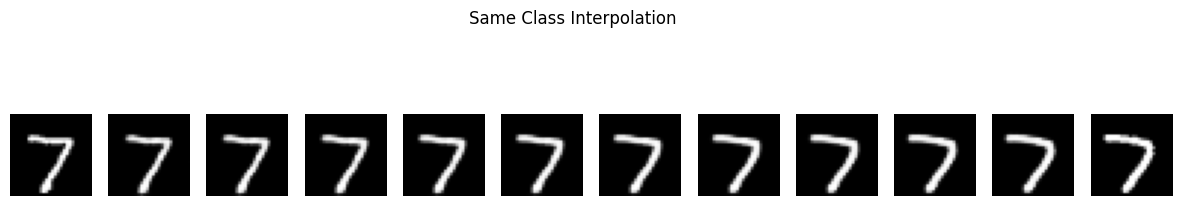

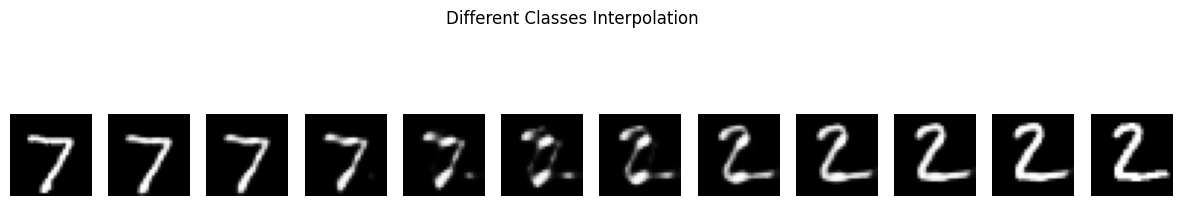

In [50]:
# ===================== YOUR CODE HERE ======================
same_class_interpolation = CAE_LATENT_SPACE_Trainer.interpolate_same_class(MNIST_testloader)     

diff_class_interpolation = CAE_LATENT_SPACE_Trainer.interpolate_different_classes(MNIST_testloader)     
# ===========================================================


<hr>

### <h1 style="text-align: left;">Task 7 | <span style="color: #9370DB;">End</span></h1>

<hr>

In [58]:
import json

print(json.dumps(Overall_Results, indent=4))

with open(f'{Roll_Number}_Overall_Results.json', 'w') as f:
    json.dump(Overall_Results, f, indent=4)

{
    "Task 1": {
        "Train Loss (Last Epoch)": 0.0115,
        "Test Loss (Last Epoch)": 0.0115,
        "Train Loss (Minimum)": 0.0115,
        "Test Loss (Minimum)": 0.0115
    },
    "Task 2": {
        "Train Loss (Last Epoch)": 0.0013,
        "Test Loss (Last Epoch)": 0.0011,
        "Train Loss (Minimum)": 0.0013,
        "Test Loss (Minimum)": 0.0011
    },
    "Task 3": {
        "Train Loss (Last Epoch)": 0.2552,
        "Test Loss (Last Epoch)": 0.2547,
        "Train Loss (Minimum)": 0.2552,
        "Test Loss (Minimum)": 0.2547
    },
    "Task 4": {
        "Train Loss (Last Epoch)": 0.2563,
        "Test Loss (Last Epoch)": 0.2516,
        "Train Loss (Minimum)": 0.2563,
        "Test Loss (Minimum)": 0.2516
    },
    "Task 5": {
        "Train Loss (Last Epoch)": 0.4004,
        "Test Loss (Last Epoch)": 0.8043,
        "Train Accuracy (Last Epoch)": 0.8442,
        "Test Accuracy (Last Epoch)": 0.7383,
        "Train Loss (Minimum)": 0.4004,
        "Test Loss (

<hr>

### <h1 style="text-align: left;">I AM SORRY  <span style="color: #9370DB;"> : ( ( ( ( (</span></h1>

<hr>